### 최종데이터 전체리 수정 후 EDA
- Block으로 Longitude, Latititude, Location, X, Y, Ward, Community Area를 채운 후 <br>외부데이터 참조해 Ward, Community Area 결측치 채움.

In [2]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
chicago = pd.read_csv('/content/drive/MyDrive/final_csv/최종데이터/최종데이터/chicago_crime_final.csv')

In [7]:
c_name = pd.read_csv('/content/drive/MyDrive/final_csv/community_areas_final.csv')

In [8]:
chicago.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,13853
Arrest,0
Domestic,0


In [9]:
# 범주형 변수의 빈도수
chicago['Primary Type'].value_counts()

,count
Primary Type,
THEFT,1754086
BATTERY,1508471
CRIMINAL DAMAGE,941565
NARCOTICS,759310
ASSAULT,550943
OTHER OFFENSE,515365
BURGLARY,439508
MOTOR VEHICLE THEFT,420504
DECEPTIVE PRACTICE,378057


**시간대별 범죄 건수와 월별 범죄 건수**

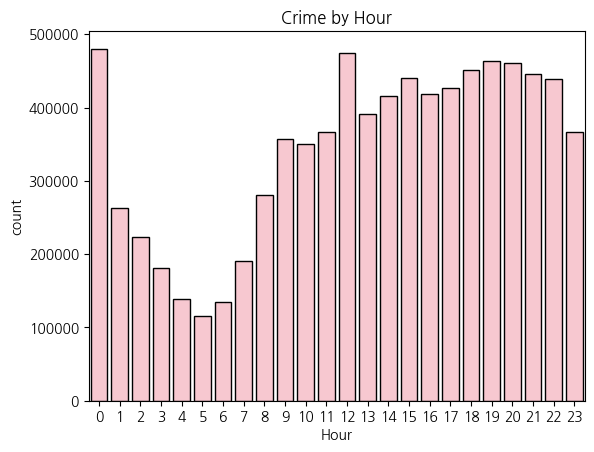

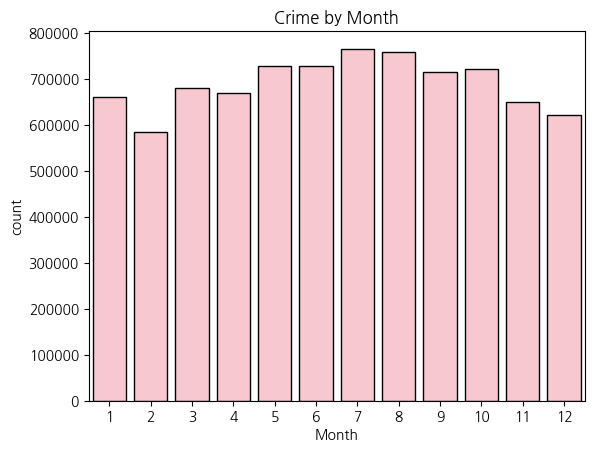

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Date' 컬럼에서 요일, 월, 시간 추출
chicago['Date'] = pd.to_datetime(chicago['Date'])
chicago['Hour'] = chicago['Date'].dt.hour
chicago['Weekday'] = chicago['Date'].dt.weekday
chicago['Month'] = chicago['Date'].dt.month

# 시간대별 범죄 발생 건수 (분홍색)
sns.countplot(x='Hour', data=chicago, color='pink', edgecolor='black')
plt.title('Crime by Hour')
plt.show()

# 월별 범죄 발생 건수 (분홍색)
sns.countplot(x='Month', data=chicago, color='pink', edgecolor='black')
plt.title('Crime by Month')
plt.show()

- 5-8월 여름에 더 범죄가 늘어나는 추이를 보임
- 더위로 인한 스트레스가 공격성과 폭력성을 높일 수 있음
- 더운 날씨로 인해 사람들이 더 많이 외출하고 활동하므로 범죄 기회가 증가
- 창문을 열어두거나 야외 활동이 늘어나면서 주거침입이나 절도의 기회가 증가
- 시카고의 5-8월 날씨
    - 6-8월: 평균 기온 22-29°C이며 습도가 높고 매우 덥습니다.
    - 특히 7월이 가장 더운 달이며 때로는 35°C 이상 올라가기도 합니다.

**년도별 범죄건수 추이**

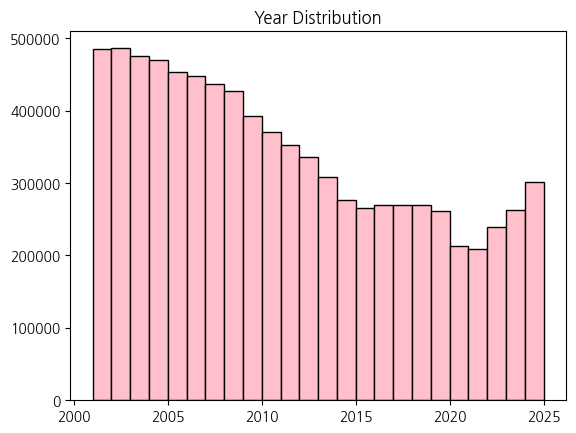

In [15]:
# 히스토그램
plt.hist(chicago['Year'], bins=range(2001, 2026), edgecolor='black', color='pink')
plt.title('Year Distribution')
plt.show()

- 전체적으로 감소세를 보이다가 2022년부터 2025년 최근에 상승세를 보임

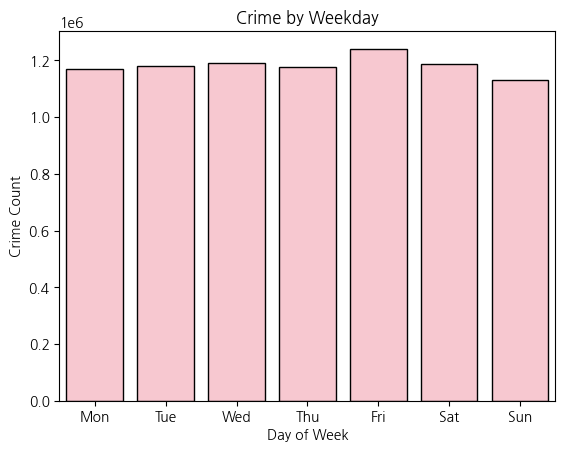

In [21]:
chicago['Date'] = pd.to_datetime(chicago['Date'], errors='coerce')
chicago['Weekday'] = chicago['Date'].dt.weekday  # 월=0, 일=6

weekday_map = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',
    4: 'Fri', 5: 'Sat', 6: 'Sun'
}
chicago['Weekday Name'] = chicago['Weekday'].map(weekday_map)
# 요일별 범죄 건수 그래프
sns.countplot(x='Weekday Name', data=chicago, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], color='pink', edgecolor='black')
plt.title('Crime by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Crime Count')
plt.show()

**모든 범죄 별 체포건수 vs 미체포 건수**

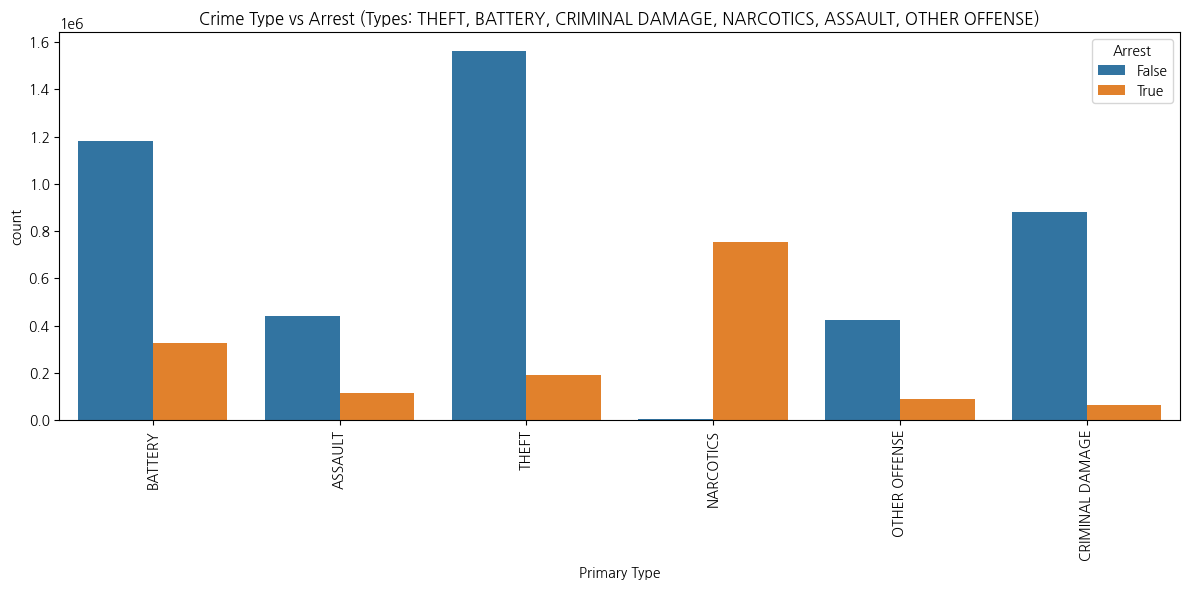

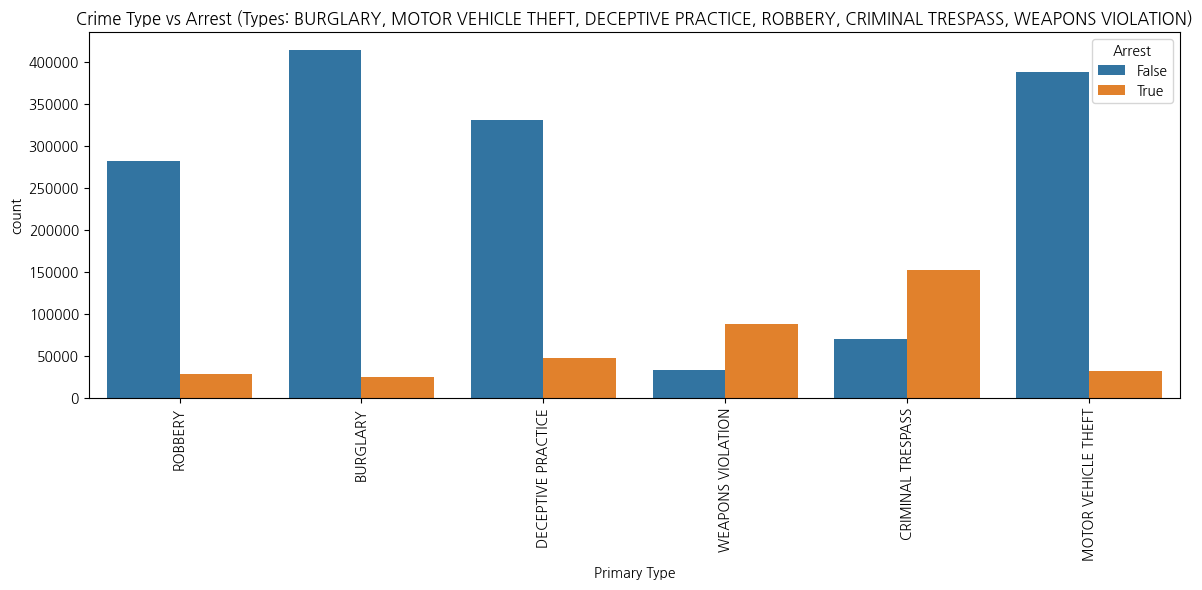

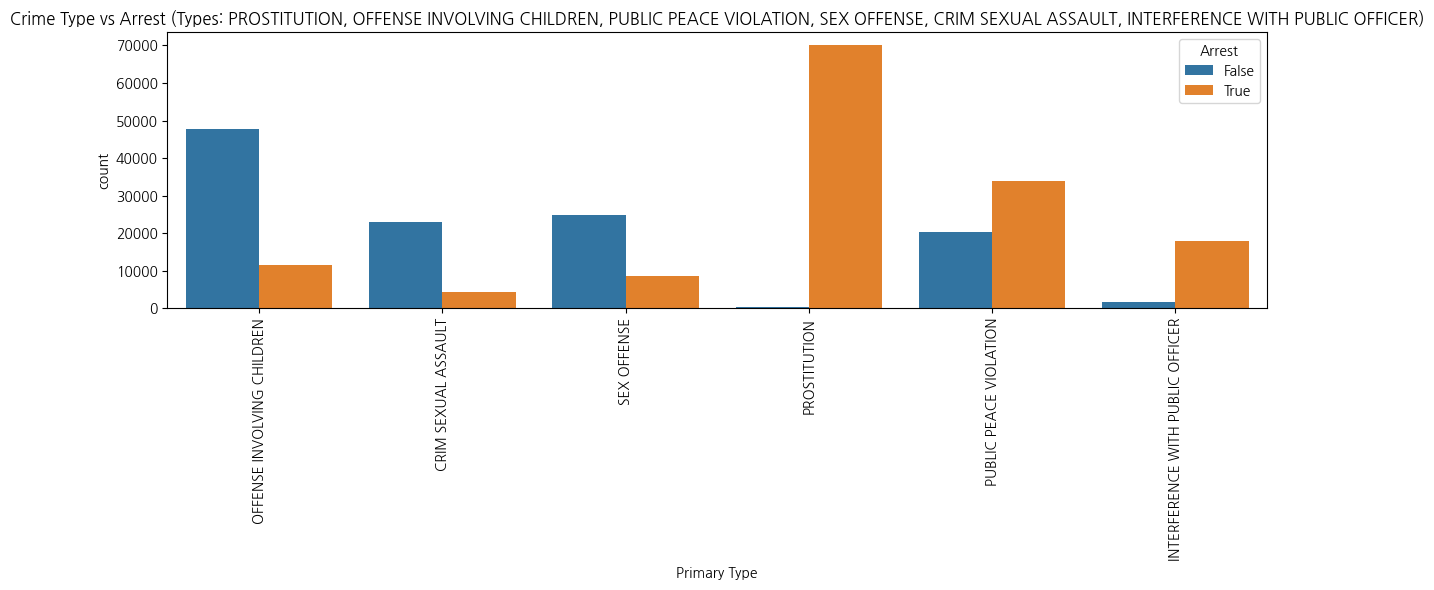

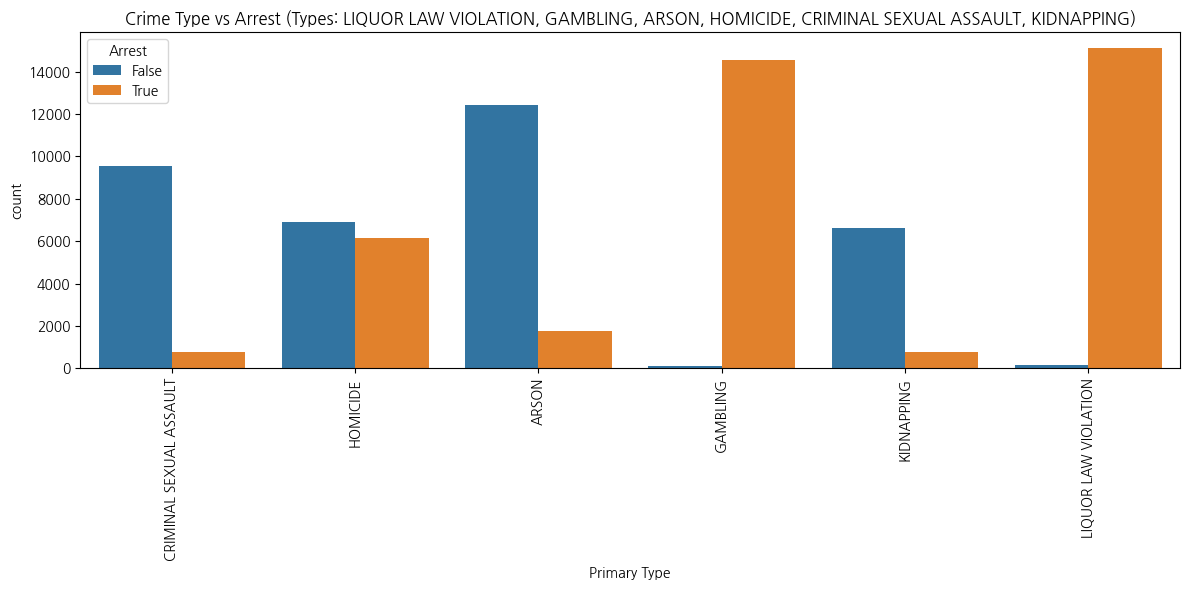

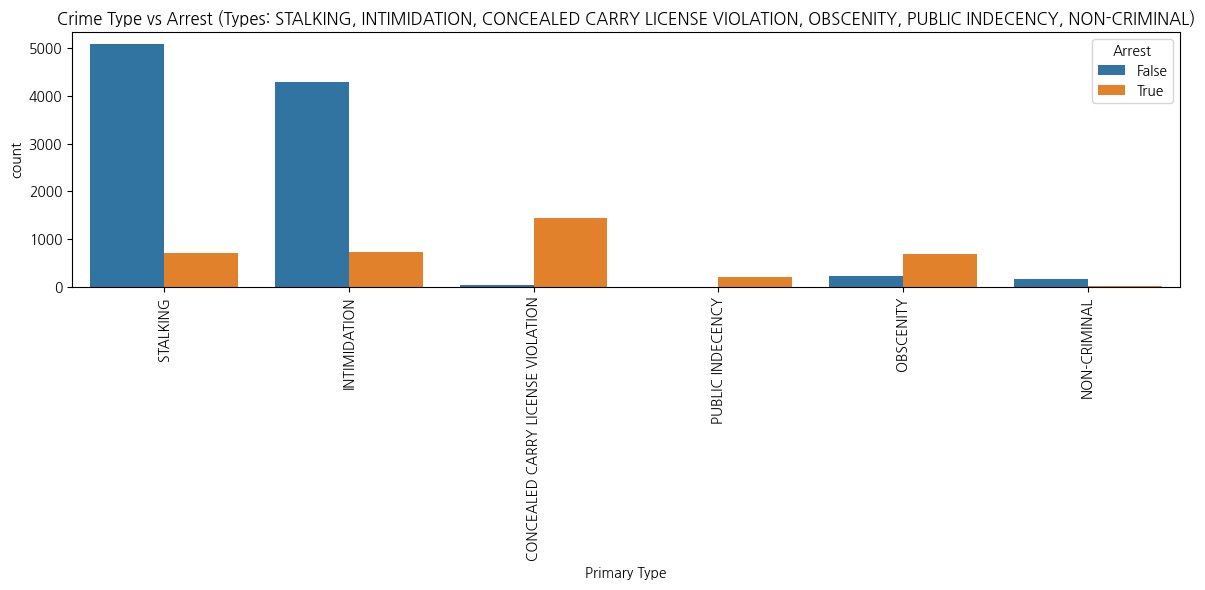

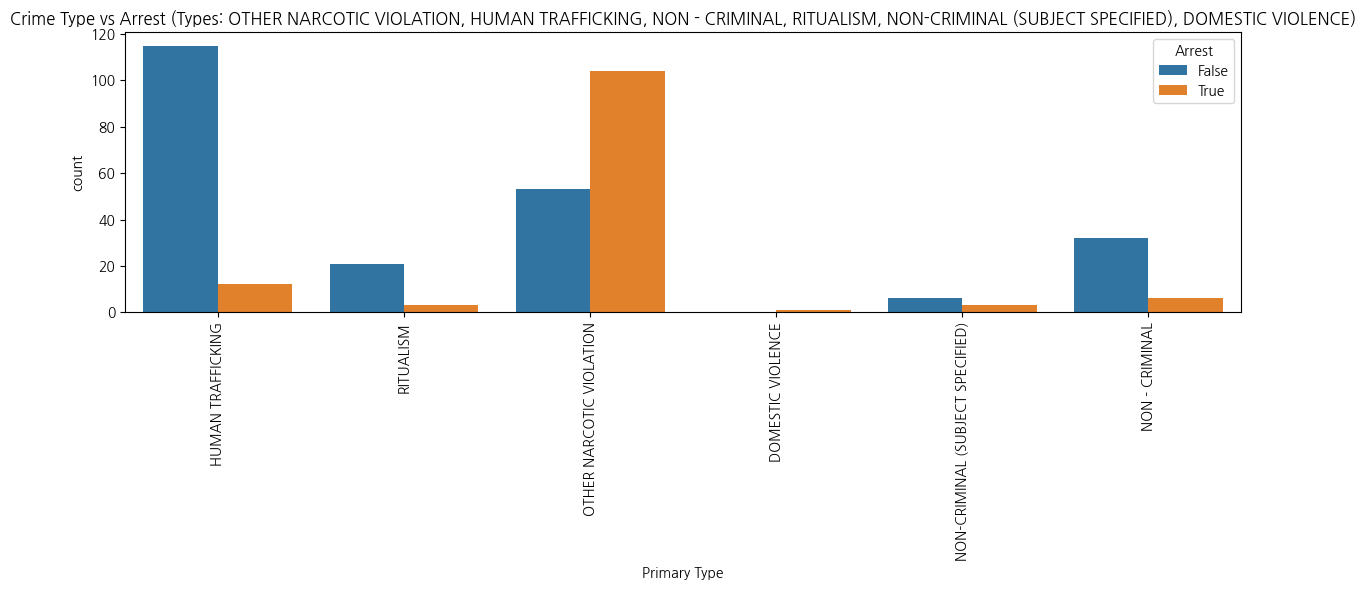

In [23]:
import numpy as np

# Primary Type의 고유 값 리스트
primary_types = chicago['Primary Type'].value_counts().index

# 6개씩 나누기
chunks = [primary_types[i:i+6] for i in range(0, len(primary_types), 6)]

# 각 그룹에 대해 개별적으로 그래프 그리기
for chunk in chunks:
    plt.figure(figsize=(12, 6))  # 그래프 크기 설정
    sns.countplot(x='Primary Type', hue='Arrest', data=chicago[chicago['Primary Type'].isin(chunk)])
    plt.title(f'Crime Type vs Arrest (Types: {", ".join(chunk)})')

    # x축 레이블 회전
    plt.xticks(rotation=90)

    # 레이아웃 자동 조정
    plt.tight_layout()

    plt.show()

**체포율이 높은 범죄(Top5)와 낮은 범죄(Bottom5)의 추이**

In [24]:
# 1. 연도별 + 범죄 유형별 체포율 계산
yearly_arrest_rate = chicago.groupby(['Year', 'Primary Type'])['Arrest'].mean().reset_index()
yearly_arrest_rate.rename(columns={'Arrest': 'Arrest Rate'}, inplace=True)

# 2. 연도별 + 범죄 유형별 범죄 발생 건수 계산
crime_trend = chicago.groupby(['Year', 'Primary Type']).size().reset_index(name='Crime Count')

# 3. 연도별 체포율을 합쳐서 최종 데이터프레임 생성
crime_trend = crime_trend.merge(yearly_arrest_rate, on=['Year', 'Primary Type'], how='left')

# 4. 확인
crime_trend.head()

,Year,Primary Type,Crime Count,Arrest Rate
0,2001,ARSON,1005,0.179104
1,2001,ASSAULT,31302,0.227717
2,2001,BATTERY,93220,0.218977
3,2001,BURGLARY,25974,0.064988
4,2001,CONCEALED CARRY LICENSE VIOLATION,1,1.000000


In [25]:
# 체포율이 높은 5개 범죄 유형
top5_arrest_types = yearly_arrest_rate.groupby('Primary Type')['Arrest Rate'].mean().nlargest(5).index

# 체포율이 낮은 5개 범죄 유형
bottom5_arrest_types = yearly_arrest_rate.groupby('Primary Type')['Arrest Rate'].mean().nsmallest(5).index

In [29]:
# 체포율 계산 전에 최소 건수 조건을 추가
# 범죄 유형별 총 건수가 100건 이상인 것만 필터링

# 1. 범죄 유형별 전체 건수 & 체포율 계산
arrest_rate = chicago.groupby('Primary Type').agg({
    'Arrest': 'mean',
    'ID': 'count'
}).rename(columns={'Arrest': 'Arrest Rate', 'ID': 'Total Count'})

# 2. 총 건수 100건 이상인 범죄만 필터링
filtered = arrest_rate[arrest_rate['Total Count'] >= 100]

# 3. 체포율 기준으로 top 5 추출 (Domestic Violence 같은 특이치 제거됨)
top5_arrest_types = filtered.sort_values(by='Arrest Rate', ascending=False).head(5).index.tolist()

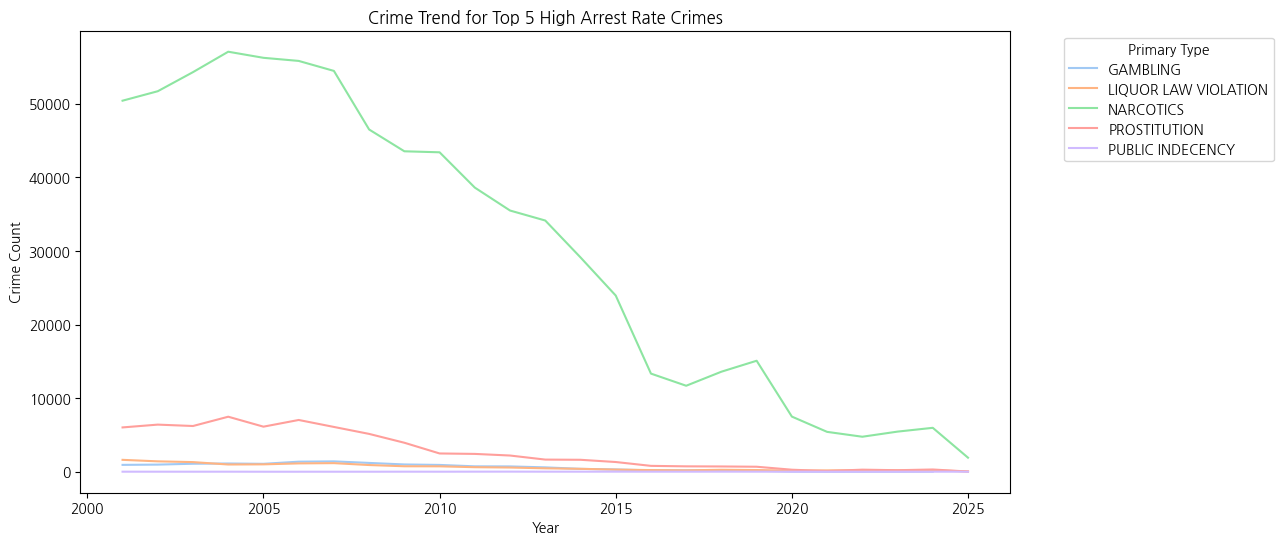

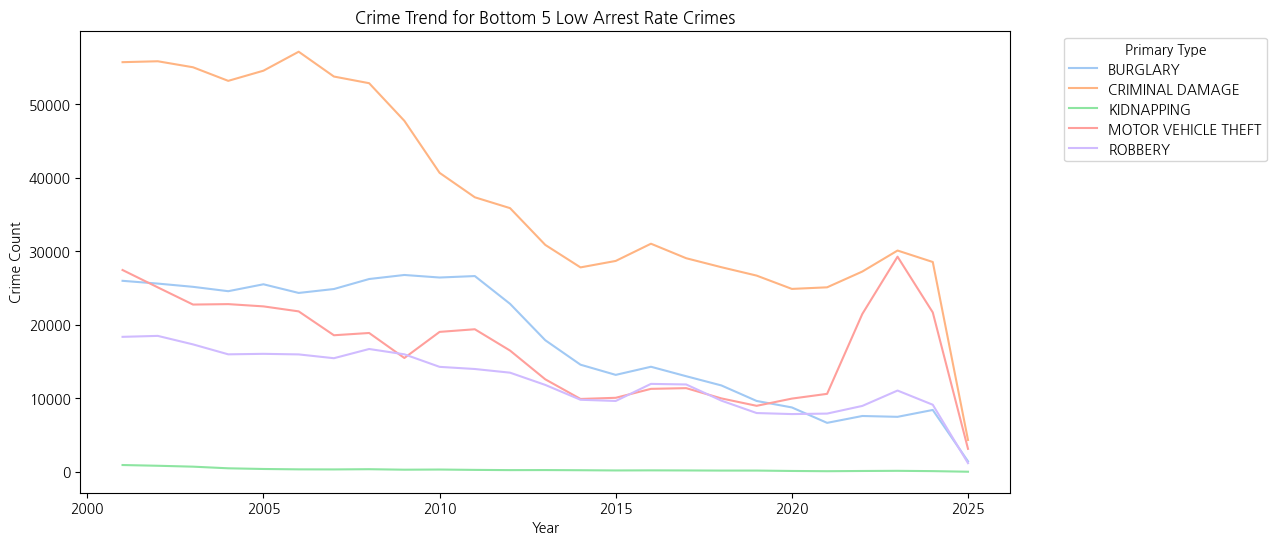

In [30]:
# 체포율이 높은 5개 범죄의 연도별 발생 건수 변화
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Crime Count', hue='Primary Type',
             data=crime_trend[crime_trend['Primary Type'].isin(top5_arrest_types)],
             palette='pastel')
plt.title('Crime Trend for Top 5 High Arrest Rate Crimes')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 체포율이 낮은 5개 범죄의 연도별 발생 건수 변화
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Crime Count', hue='Primary Type',
             data=crime_trend[crime_trend['Primary Type'].isin(bottom5_arrest_types)],
             palette='pastel')
plt.title('Crime Trend for Bottom 5 Low Arrest Rate Crimes')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

-> 전체적으로 감소추세이지만 체포율이 높은 항목들이 조금 더 확연하게 감소추세를 보임

► 체포율 하위 다섯개의 그래프에서 **범죄건수는 전체적으로 감소세**이지만 <br>
**2020년에서 2023년** Motor Vehicle Theft와 Criminal Dammage, 그중에서도 특히 **Motor Vehicle Theft가 증가세**인 것을 볼 수 있었다.<br>
체포율에 변화가 있었을까?

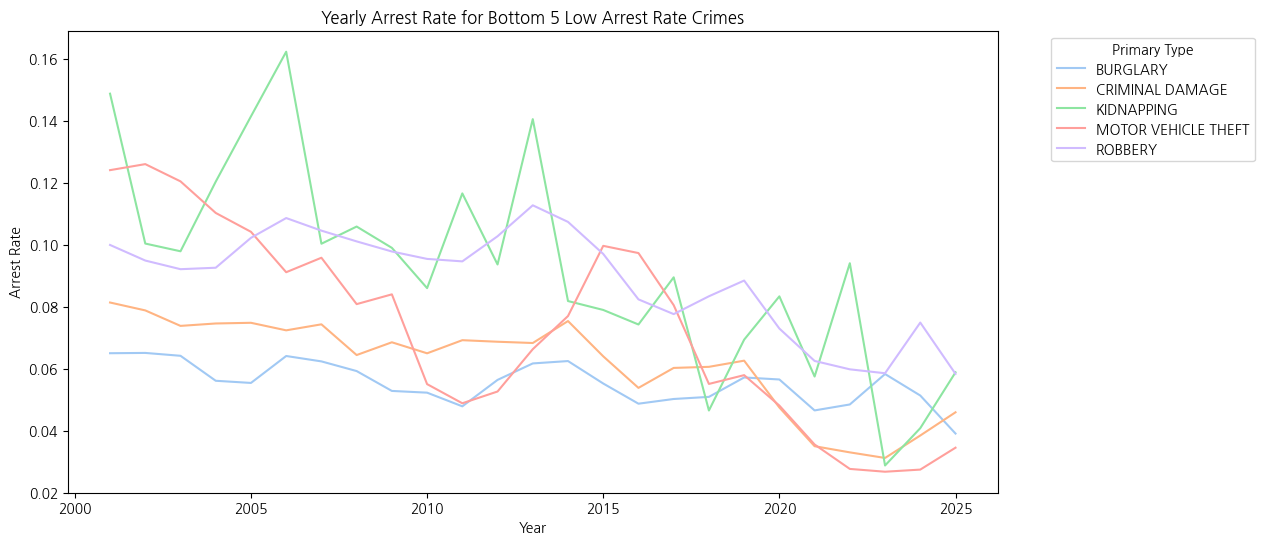

In [27]:
# 하위 5개 범죄 유형에 대한 연도별 체포율 추이 시각화
plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Arrest Rate', hue='Primary Type',
             data=crime_trend[crime_trend['Primary Type'].isin(bottom5_arrest_types)],
             palette='pastel')

# 제목과 레이블 설정
plt.title('Yearly Arrest Rate for Bottom 5 Low Arrest Rate Crimes')
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

확연하게 **Motor Vehicle Theft와 Crimial Damage의 체포율이 2020년에서 2023년 감소**

### 전체 범죄 발생비율 확인

In [ ]:
# 범죄 유형별 발생 건수 비율 계산
crime_ratio = chicago['Primary Type'].value_counts(normalize=True) * 100
print(crime_ratio)

Primary Type
THEFT                                21.193132
BATTERY                              18.225574
CRIMINAL DAMAGE                      11.376130
NARCOTICS                             9.174098
ASSAULT                               6.656576
OTHER OFFENSE                         6.226718
BURGLARY                              5.310202
MOTOR VEHICLE THEFT                   5.080593
DECEPTIVE PRACTICE                    4.567742
ROBBERY                               3.756474
CRIMINAL TRESPASS                     2.700349
WEAPONS VIOLATION                     1.467836
PROSTITUTION                          0.849230
OFFENSE INVOLVING CHILDREN            0.717076
PUBLIC PEACE VIOLATION                0.653753
SEX OFFENSE                           0.402759
CRIM SEXUAL ASSAULT                   0.330229
INTERFERENCE WITH PUBLIC OFFICER      0.237692
LIQUOR LAW VIOLATION                  0.184217
GAMBLING                              0.177040
ARSON                                 0.171337


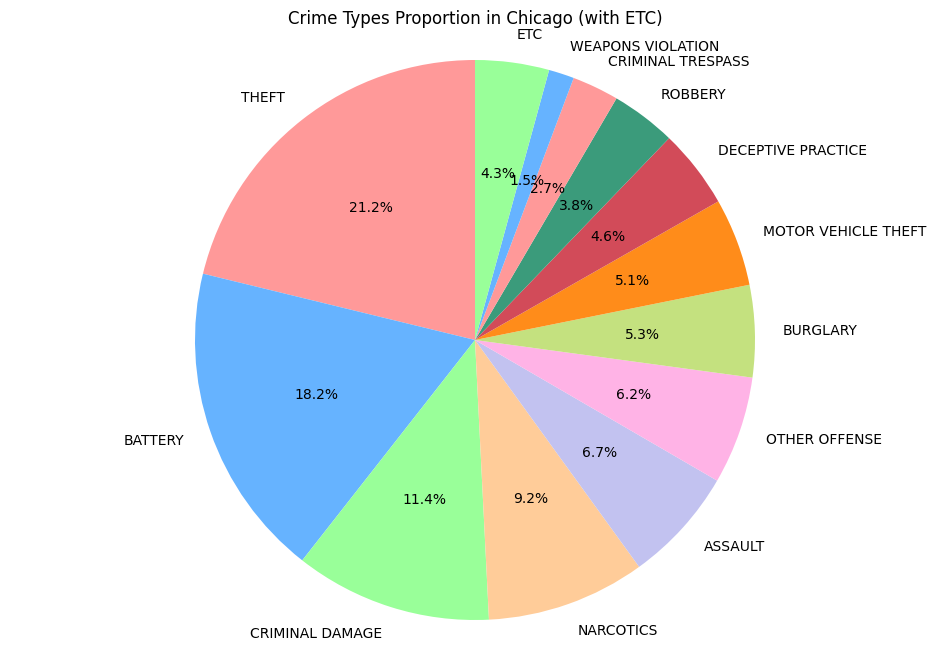

In [ ]:
# 0.9% 이하의 범죄를 "ETC"
threshold = 0.9  # 1% 이하를 묶을 기준
crime_ratio_etc = crime_ratio[crime_ratio > threshold]
crime_ratio_etc['ETC'] = crime_ratio[crime_ratio <= threshold].sum()

# 파이 차트 그리기
plt.figure(figsize=(12, 8))
# 색상 목록
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#ff8c1a', '#d24b59', '#3b9b7b']
plt.pie(crime_ratio_etc, labels=crime_ratio_etc.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Crime Types Proportion in Chicago (with ETC)')
plt.axis('equal')  # 원형 유지
plt.show()

#### **범죄 발생률이 제일 높은 THEFT의 년도별 추이와 체포율**

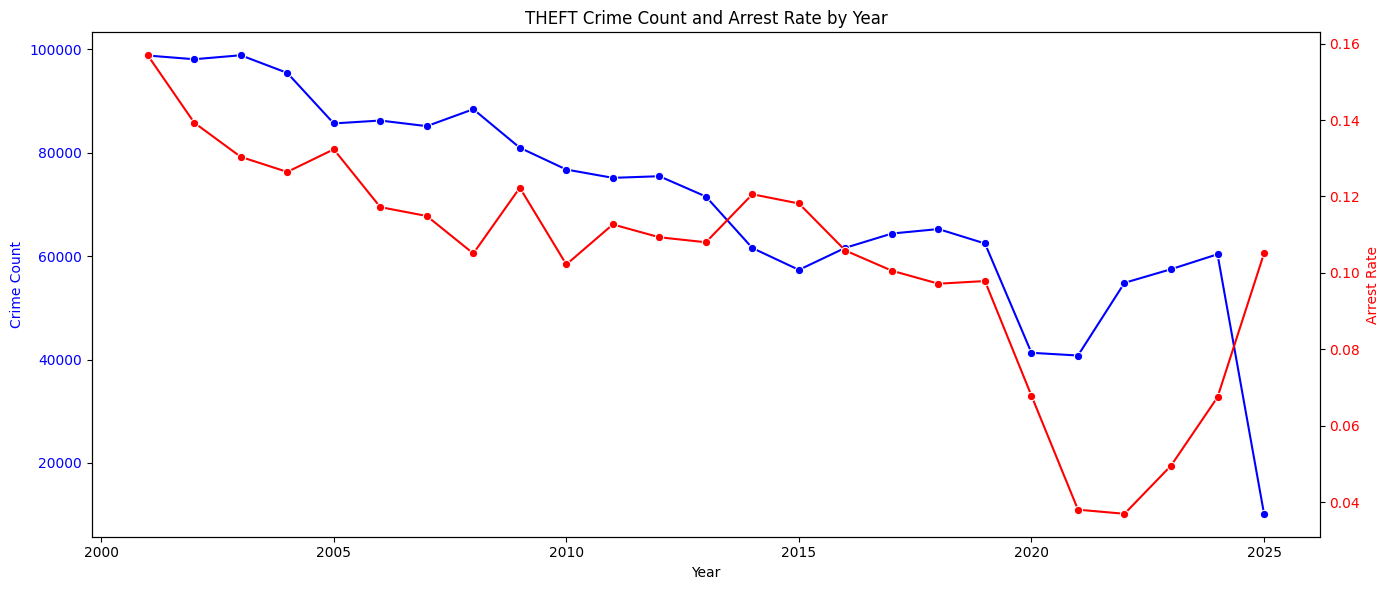

In [ ]:

# THEFT 범죄 데이터 필터링
theft_data = chicago[chicago['Primary Type'] == 'THEFT']

# 1. THEFT 범죄의 년도별 발생 건수 추이
theft_yearly_count = theft_data.groupby('Year').size().reset_index(name='Crime Count')

# 2. THEFT 범죄의 년도별 체포율 (Arrest Rate)
theft_yearly_arrest_rate = theft_data.groupby('Year')['Arrest'].mean().reset_index()
theft_yearly_arrest_rate.rename(columns={'Arrest': 'Arrest Rate'}, inplace=True)

# 그래프 그리기 (두 축을 사용하여 겹쳐서 시각화)
fig, ax1 = plt.subplots(figsize=(14, 6))

# 1. THEFT 범죄의 년도별 발생 건수 추이
sns.lineplot(x='Year', y='Crime Count', data=theft_yearly_count, ax=ax1, marker='o', color='blue')
ax1.set_title('THEFT Crime Count and Arrest Rate by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crime Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 2. THEFT 범죄의 년도별 체포율
ax2 = ax1.twinx()  # 두 번째 y축 생성
sns.lineplot(x='Year', y='Arrest Rate', data=theft_yearly_arrest_rate, ax=ax2, marker='o', color='red')
ax2.set_ylabel('Arrest Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()  # 레이아웃 조정
plt.show()


► 확연하진 않지만 체포율이 낮아지면 범죄건수가 확실히 증가하는 것을 볼 수 있다.

### 장소별 범죄 발생률(Location Description)

- 범죄건수가 많은 장소에서 상위 3개 범죄씩 범죄 건수 시각화

In [ ]:
location_crime_count = chicago['Location Description'].value_counts()

In [ ]:
location_crime_top5 = location_crime_count.sort_values(ascending=False).head(5)

<ipython-input-27-e4d64181b8b3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_location_crime['Rank'] = top_5_location_crime.groupby('Location Description')['Crime Count'].rank(method='first', ascending=False)
<ipython-input-27-e4d64181b8b3>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crime Count', y='Primary Type', data=data, ax=ax, palette='viridis')
<ipython-input-27-e4d64181b8b3>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

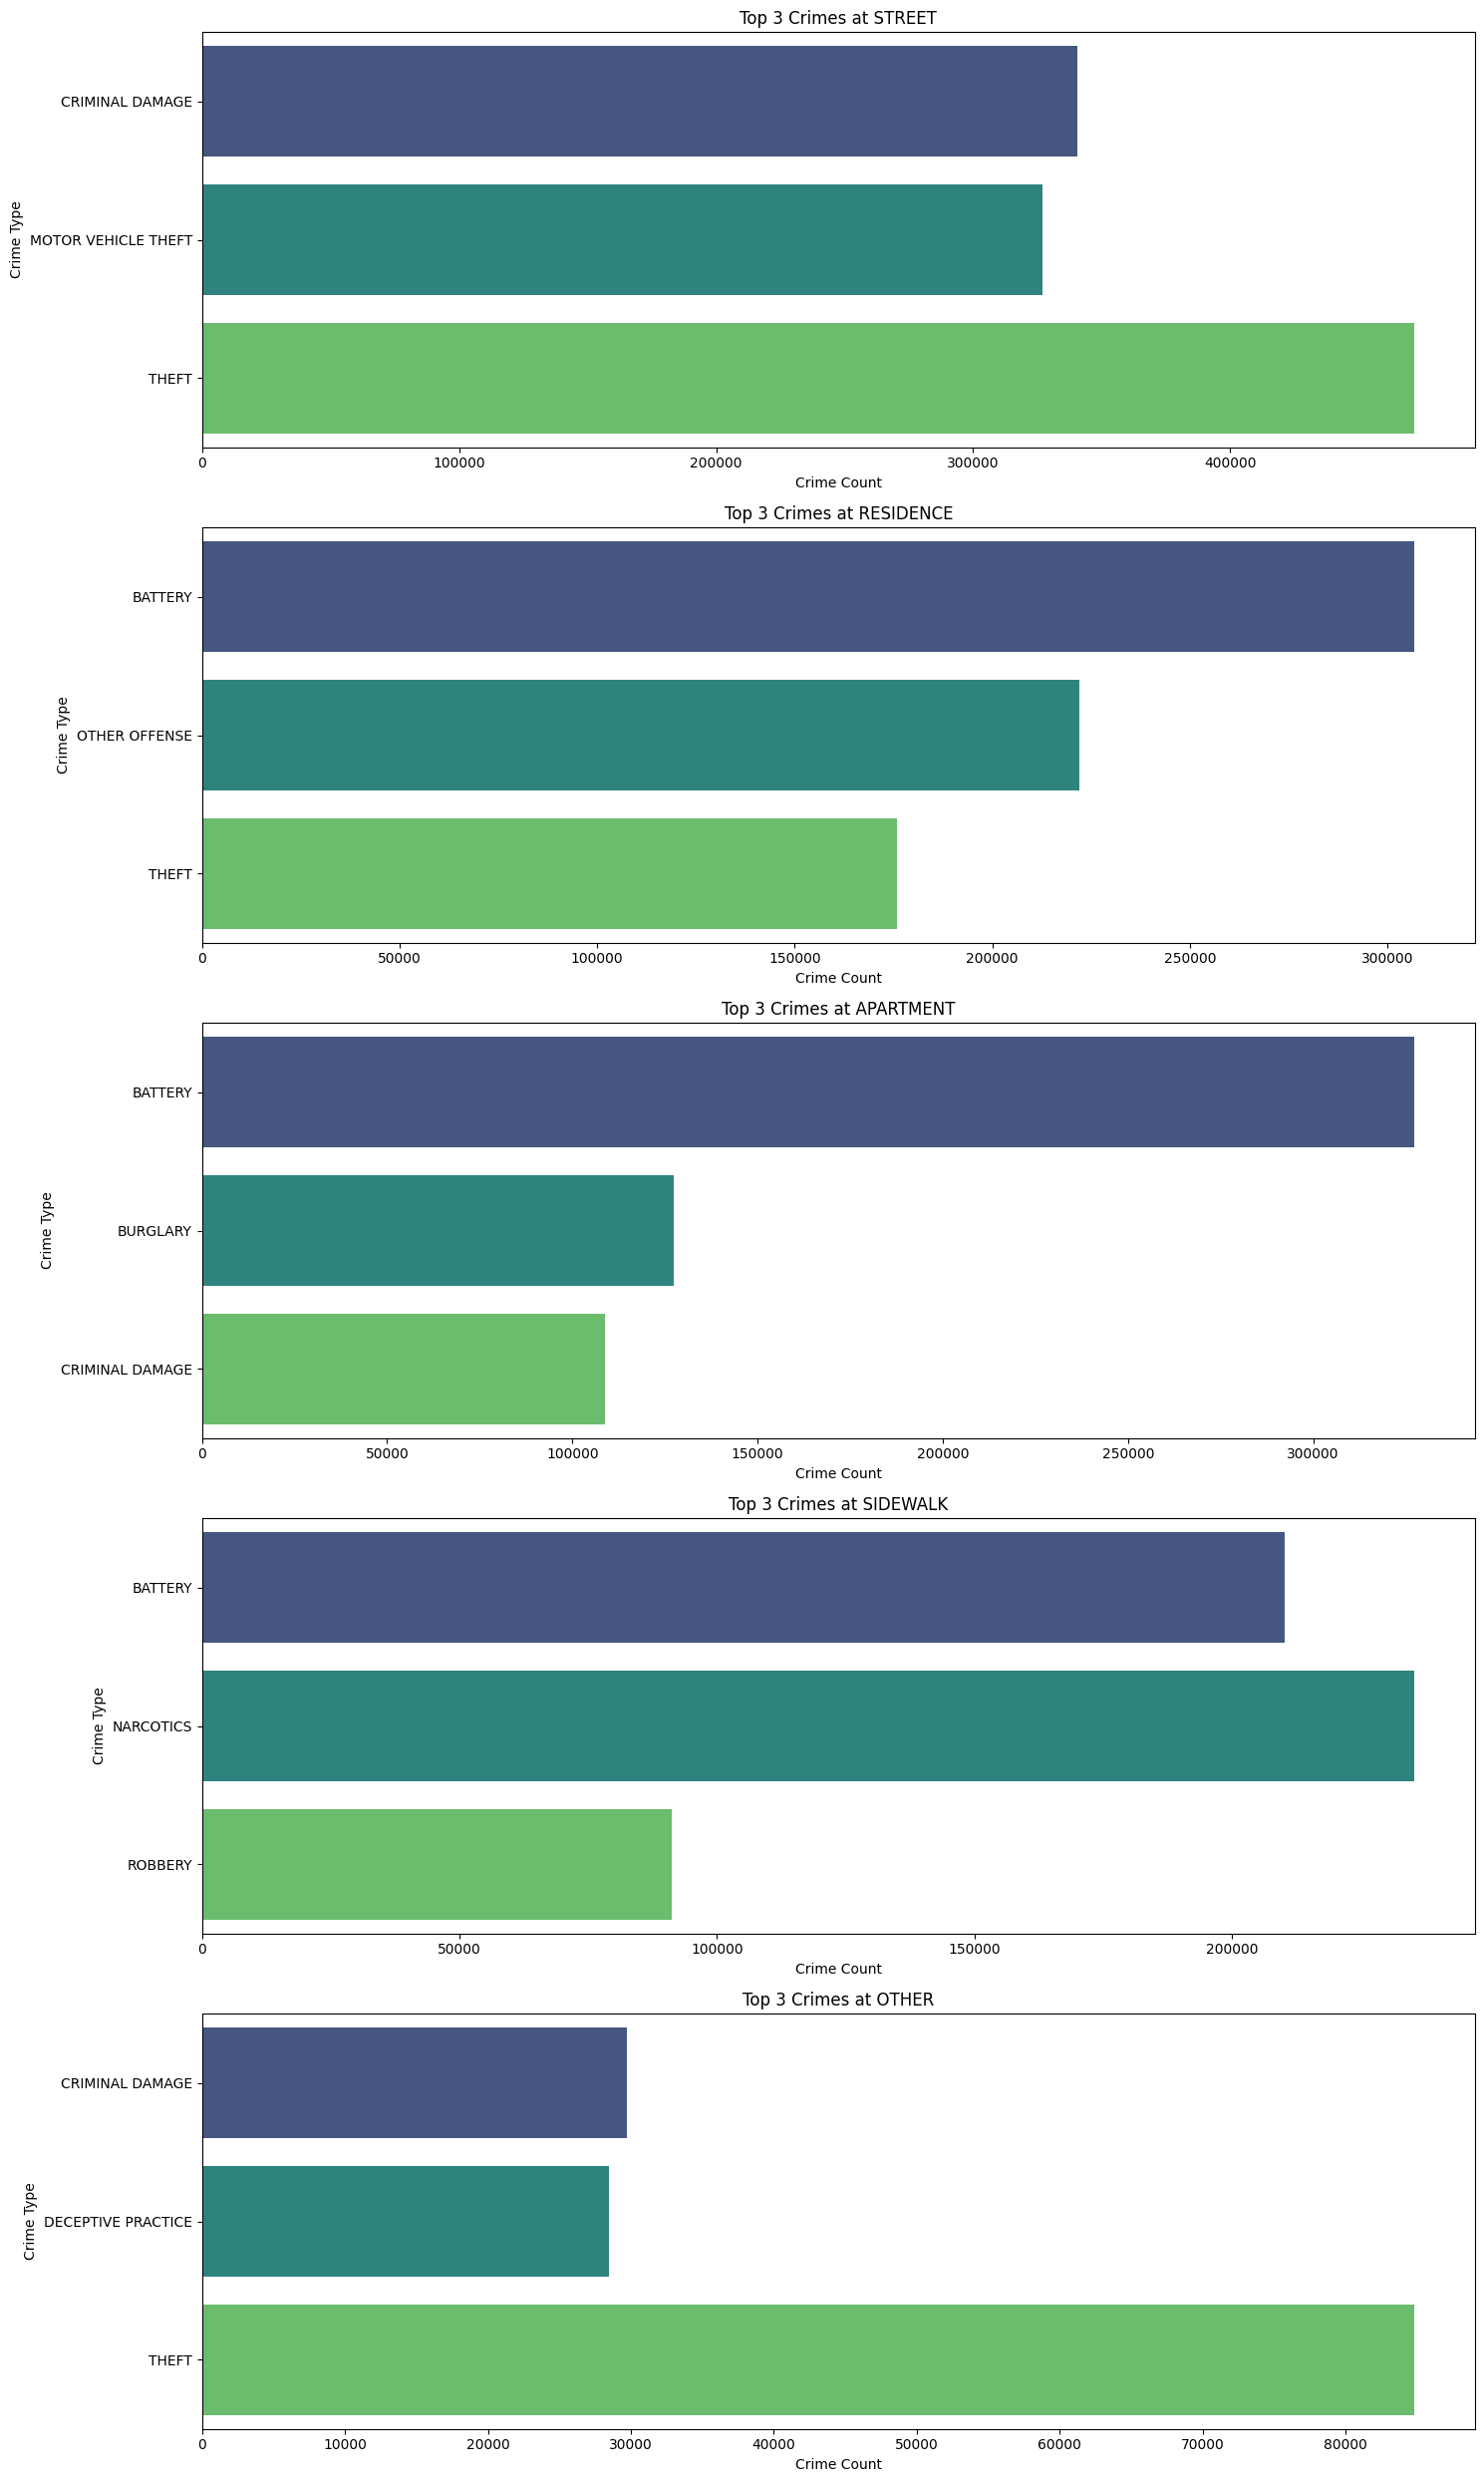

In [ ]:
# 1. 상위 5개 주거지역만 추출
top_5_locations = location_crime_top5.index

# 2. 주거지역별 범죄 발생 건수와 범죄 유형 집계
location_crime_detail = chicago.groupby(['Location Description', 'Primary Type']).size().reset_index(name='Crime Count')

# 3. 상위 5 주거지역에 대해서만 필터링
top_5_location_crime = location_crime_detail[location_crime_detail['Location Description'].isin(top_5_locations)]

# 4. 주거지역별로 범죄 발생 건수를 내림차순 정렬하고 Rank 부여
top_5_location_crime['Rank'] = top_5_location_crime.groupby('Location Description')['Crime Count'].rank(method='first', ascending=False)

# 5. Rank가 1~3인 경우만 필터링 (상위 3개 범죄)
top_3_crimes_by_location = top_5_location_crime[top_5_location_crime['Rank'] <= 3]

# 6. 시각화 (주거 지역별로 subplot을 나눠서 상위 3개 범죄 유형을 표시)
num_locations = len(top_5_locations)
fig, axes = plt.subplots(num_locations, 1, figsize=(15, 5 * num_locations))

# 각 주거지역에 대해 subplot을 생성
for i, location in enumerate(top_5_locations):
    ax = axes[i] if num_locations > 1 else axes  # 여러 개의 subplot일 경우 인덱스로 접근
    data = top_3_crimes_by_location[top_3_crimes_by_location['Location Description'] == location]

    sns.barplot(x='Crime Count', y='Primary Type', data=data, ax=ax, palette='viridis')
    ax.set_title(f'Top 3 Crimes at {location}')
    ax.set_xlabel('Crime Count')
    ax.set_ylabel('Crime Type')

plt.tight_layout()
plt.show()

In [ ]:
# 6. 주거지역별로 상위 3개 범죄를 하나의 표로 만들기
top_3_crimes_pivot = top_3_crimes_by_location.pivot_table(index='Location Description',
                                                         columns='Rank',
                                                         values='Primary Type',
                                                         aggfunc='first')

# 7. 결과 출력
top_3_crimes_pivot.columns = [f'Crime {i}' for i in range(1, 4)]  # 열 이름을 Crime 1, Crime 2, Crime 3으로 변경
top_3_crimes_pivot = top_3_crimes_pivot.reset_index()  # Index를 초기화하여 보기 좋게 정리

# 출력
print(top_3_crimes_pivot)


  Location Description    Crime 1          Crime 2              Crime 3
0            APARTMENT    BATTERY         BURGLARY      CRIMINAL DAMAGE
1                OTHER      THEFT  CRIMINAL DAMAGE   DECEPTIVE PRACTICE
2            RESIDENCE    BATTERY    OTHER OFFENSE                THEFT
3             SIDEWALK  NARCOTICS          BATTERY              ROBBERY
4               STREET      THEFT  CRIMINAL DAMAGE  MOTOR VEHICLE THEFT


| 위치 설명           | 범죄 1               | 범죄 2               | 범죄 3               |
|---------------------|----------------------|----------------------|----------------------|
| 아파트              | 폭행                 | 절도                 | 재산 피해            |
| 기타                | 절도                 | 재산 피해            | 사기                 |
| 주거지              | 폭행                 | 기타 범죄            | 절도                 |
| 인도                | 마약                 | 폭행                 | 강도                 |
| 거리                | 절도                 | 재산 피해            | 차량 도난            |


In [ ]:
# 'Location Description'에 포함된 모든 고유 값 확인
chicago['Location Description'].unique()

array(['RESIDENCE', 'STREET', 'SCHOOL - PUBLIC GROUNDS',
       'RESIDENCE - GARAGE', 'APARTMENT', 'RESIDENCE-GARAGE',
       'RESTAURANT', 'SIDEWALK', 'SMALL RETAIL STORE', nan, 'HOTEL/MOTEL',
       'OTHER', 'VEHICLE NON-COMMERCIAL', 'BANK', 'GAS STATION',
       'OTHER (SPECIFY)', 'HOSPITAL BUILDING / GROUNDS', 'PARK PROPERTY',
       'CONVENIENCE STORE', 'AUTO', 'CHA PARKING LOT / GROUNDS',
       'DAY CARE CENTER', 'TAXICAB', 'GROCERY FOOD STORE',
       'COMMERCIAL / BUSINESS OFFICE', 'HOTEL / MOTEL',
       'RESIDENCE - YARD (FRONT / BACK)',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'CTA BUS',
       'SCHOOL - PRIVATE BUILDING',
       'OTHER RAILROAD PROPERTY / TRAIN DEPOT', 'CTA BUS STOP',
       'CTA TRAIN', 'HOUSE', 'PARKING LOT', 'ALLEY', 'BAR OR TAVERN',
       'CHA LOBBY', 'SCHOOL - PUBLIC BUILDING',
       'GOVERNMENT BUILDING / PROPERTY', 'RESIDENCE - PORCH / HALLWAY',
       'CURRENCY EXCHANGE', 'VACANT LOT / LAND',
       'HOSPITAL BUILDING/GROUNDS', 'DEPARTMEN

### 장소 그룹화

**너무 많은 장소들 파악**

1. 먼저 그룹화하여 큰 흐름을 파악한 후
2. 그룹 내에서 상위 장소를 분석

그룹 분류 기준

    - 주거지 (Residential) → 아파트, 주택, 기숙사 등
    - 상업지구 (Commercial) → 가게, 음식점, 금융기관, 호텔 등
    - 교통시설 (Transportation) → 도로, 주차장, 대중교통 등
    - 공공시설 (Public Facilities) → 공원, 학교, 도서관 등
    - 정부 기관 (Government) → 경찰서, 소방서, 법원, 교도소 등
    - 의료 기관 (Healthcare) → 병원, 약국, 치과, 요양원 등
    - 산업시설 (Industrial/Other) → 창고, 공장
    - 유흥 시설 (Entertainment) → 유흥시설, 체육관, 술집 등
    - 기타/미확인 (Unknown/Other) → 특정 그룹에 포함되지 않는 것

In [31]:
location_mapping = {
    '주거지': [
        'RESIDENCE', 'APARTMENT', 'HOUSE', 'ROOMING HOUSE',
        'RESIDENCE - GARAGE', 'RESIDENCE-GARAGE', 'RESIDENCE - YARD (FRONT / BACK)',
        'RESIDENCE - PORCH / HALLWAY', 'RESIDENCE PORCH/HALLWAY',
        'DRIVEWAY - RESIDENTIAL', 'GARAGE', 'COACH HOUSE'
    ],
    '상업지구': [
        'RESTAURANT', 'GROCERY FOOD STORE', 'DEPARTMENT STORE', 'SMALL RETAIL STORE', 'RETAIL STORE',
        'CONVENIENCE STORE', 'HOTEL/MOTEL', 'HOTEL', 'MOTEL', 'BANK', 'CURRENCY EXCHANGE',
        'CREDIT UNION', 'DRUG STORE', 'PAWN SHOP'
    ],
    '교통시설': [
        'STREET', 'SIDEWALK', 'PARKING LOT', 'PARKING LOT/GARAGE(NON.RESID.)',
        'HIGHWAY/EXPRESSWAY', 'EXPRESSWAY EMBANKMENT', 'ALLEY', 'TAXICAB',
        'CTA BUS', 'CTA TRAIN', 'CTA BUS STOP', 'CTA PLATFORM', 'CTA STATION',
        'CTA SUBWAY STATION', 'CTA GARAGE / OTHER PROPERTY', 'CTA PROPERTY', 'CTA TRACKS - RIGHT OF WAY',
        'VEHICLE - COMMERCIAL', 'VEHICLE - OTHER RIDE SERVICE', 'VEHICLE - DELIVERY TRUCK',
        'VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS', 'AIRPORT/AIRCRAFT',
        'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
        'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
        'AIRPORT PARKING LOT', 'AIRPORT TRANSPORTATION SYSTEM (ATS)'
    ],
    '공공시설': [
        'SCHOOL - PUBLIC GROUNDS', 'SCHOOL - PRIVATE BUILDING', 'SCHOOL - PUBLIC BUILDING',
        'SCHOOL, PRIVATE, GROUNDS', 'SCHOOL, PUBLIC, BUILDING', 'SCHOOL, PRIVATE, BUILDING',
        'COLLEGE / UNIVERSITY - GROUNDS', 'COLLEGE / UNIVERSITY - RESIDENCE HALL',
        'PUBLIC GRAMMAR SCHOOL', 'PUBLIC HIGH SCHOOL', 'LIBRARY', 'HOSPITAL',
        'HOSPITAL BUILDING / GROUNDS', 'MEDICAL/DENTAL OFFICE', 'POLICE FACILITY', 'GOVERNMENT BUILDING',
        'GOVERNMENT BUILDING / PROPERTY', 'FIRE STATION', 'YMCA', 'CHURCH', 'CHURCH PROPERTY',
        'CHURCH / SYNAGOGUE / PLACE OF WORSHIP', 'PARK PROPERTY', 'ATHLETIC CLUB', 'MOVIE HOUSE/THEATER',
        'SPORTS ARENA / STADIUM', 'POOL ROOM', 'BOWLING ALLEY'
    ],
    '산업시설': [
        'WAREHOUSE', 'FACTORY / MANUFACTURING BUILDING', 'FACTORY',
        'CONSTRUCTION SITE', 'JUNK YARD/GARBAGE DUMP', 'DUMPSTER',
        'GARAGE/AUTO REPAIR', 'LAUNDRY ROOM', 'LOADING DOCK',
        'COIN OPERATED MACHINE', 'ANIMAL HOSPITAL', 'FARM', 'KENNEL',
        'TRUCKING TERMINAL', 'HORSE STABLE', 'AUTO / BOAT / RV DEALERSHIP'
    ],
    '유흥시설': [
        'CASINO/GAMBLING ESTABLISHMENT', 'TAVERN / LIQUOR STORE', 'BAR OR TAVERN',
        'MOVIE HOUSE/THEATER', 'SPORTS ARENA / STADIUM', 'POOL ROOM', 'BOWLING ALLEY'
    ],
    '기타': [
        'OTHER', 'OTHER (SPECIFY)', 'UNKNOWN', 'FOREST PRESERVE', 'LAKE',
        'LAKEFRONT/WATERFRONT/RIVERBANK', 'LAGOON', 'RIVER', 'RIVER BANK',
        'SEWER', 'BEACH', 'PRAIRIE', 'WOODED AREA', 'BRIDGE'
    ]
}


In [32]:
# location_category 컬럼 추가
def categorize_location(location):
    for category, locations in location_mapping.items():
        if location in locations:
            return category
    return '기타'  # 매핑되지 않은 값은 '기타'로 처리

chicago['location_category'] = chicago['Location Description'].apply(categorize_location)

In [33]:
# Community Area Name 별로 location_category의 분포 계산
facility_distribution = chicago.groupby('Community Area Name')['location_category'].value_counts().unstack(fill_value=0)

# 결과 출력
print(facility_distribution)

location_category    공공시설    교통시설     기타  산업시설   상업지구  유흥시설    주거지
Community Area Name                                               
Albany Park          2406   31792   8187   175   5828   264  25869
Archer Heights       1962   11754   4210   339   2905   173   8477
Armour Square         883   16377   6699   215   2523   107   5308
Ashburn              4019   24709   9867   184   5048   137  30267
Auburn Gresham       5966   94653  23564   499  10251   499  95650
...                   ...     ...    ...   ...    ...   ...    ...
West Lawn            2036   20571   6789   105  11800    74  19738
West Pullman         2846   53913  12197   293   3821   117  60096
West Ridge           3500   41563  12439   217   8556   377  39186
West Town            9073  116714  33362  1538  18453  3420  63027
Woodlawn             5673   54246  15950   377   4827   107  51174

[77 rows x 7 columns]


**각 커뮤니티 지역별로 어떤 유형의 시설이 많은지 시각화**

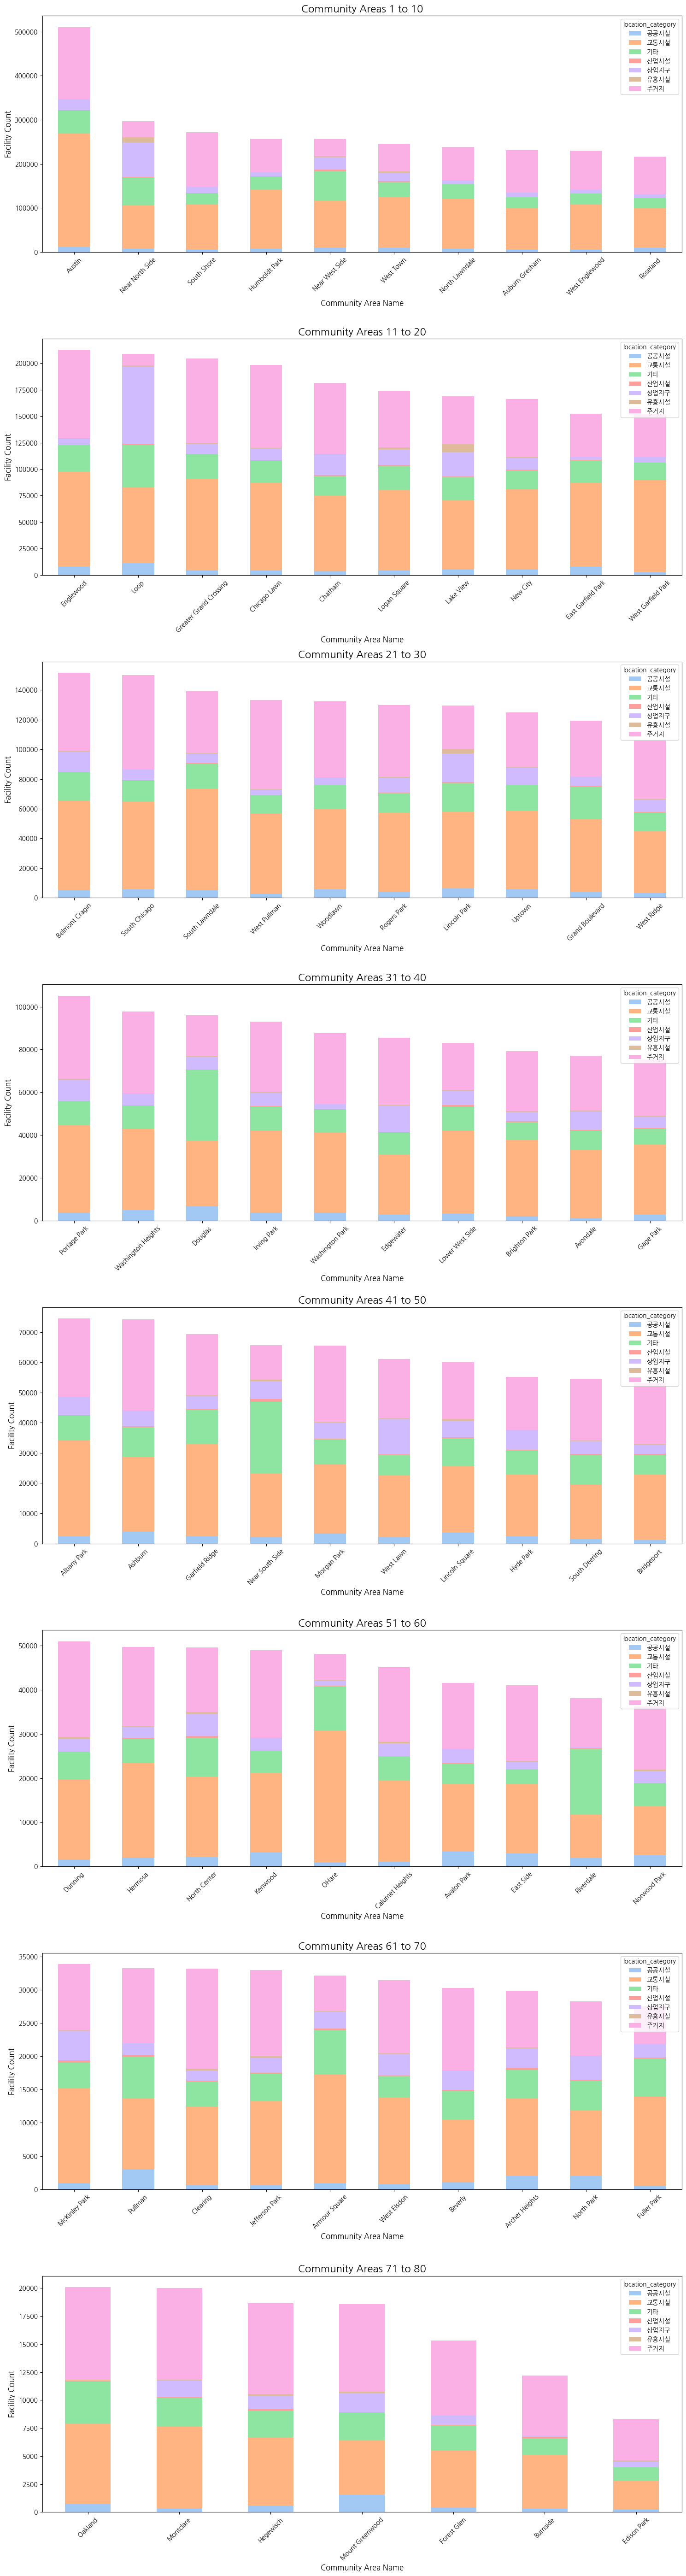

In [35]:
# 각 Community Area의 시설 수 총합 계산
facility_distribution['Total Facilities'] = facility_distribution.sum(axis=1)

# 시설 수 총합을 기준으로 내림차순 정렬
facility_distribution_sorted = facility_distribution.sort_values(by='Total Facilities', ascending=False)

# Community Area 수
total_community_areas = len(facility_distribution_sorted)

# 한 번에 표시할 Community Area 수
chunk_size = 10

# 전체 Community Area를 10개씩 나누기
chunks = [facility_distribution_sorted.iloc[i:i + chunk_size] for i in range(0, total_community_areas, chunk_size)]

# 파스텔 계열 색상 12개 지정
pastel_colors = sns.color_palette("pastel", n_colors=12)

# 서브플롯 설정
num_chunks = len(chunks)
fig, axes = plt.subplots(num_chunks, 1, figsize=(15, 7 * num_chunks))

# 각 서브플롯에 대해 시각화
for i, chunk in enumerate(chunks):
    ax = axes[i] if num_chunks > 1 else axes  # 한 개의 플롯일 경우, axes는 1차원
    chunk.drop('Total Facilities', axis=1).plot(kind='bar', stacked=True, ax=ax, color=pastel_colors)
    ax.set_title(f'Community Areas {i * chunk_size + 1} to {(i + 1) * chunk_size}', fontsize=16)
    ax.set_xlabel('Community Area Name', fontsize=12)
    ax.set_ylabel('Facility Count', fontsize=12)
    ax.tick_params(axis='x', rotation=45)


# 레이아웃 조정
plt.tight_layout()
plt.show()


► Community Area 모두 교통 시설 , 주거지가 많이 차지하고 그 다음으로 기타(자연)인 것을 볼 수 있다.<br>
  특히 1위인 Austin은 교통시설 > 주거지 순

**교통시설과 주거지 중에서도 top 5씩 어떤 시설이 두드러지게 사건 발생이 많은지 분석**

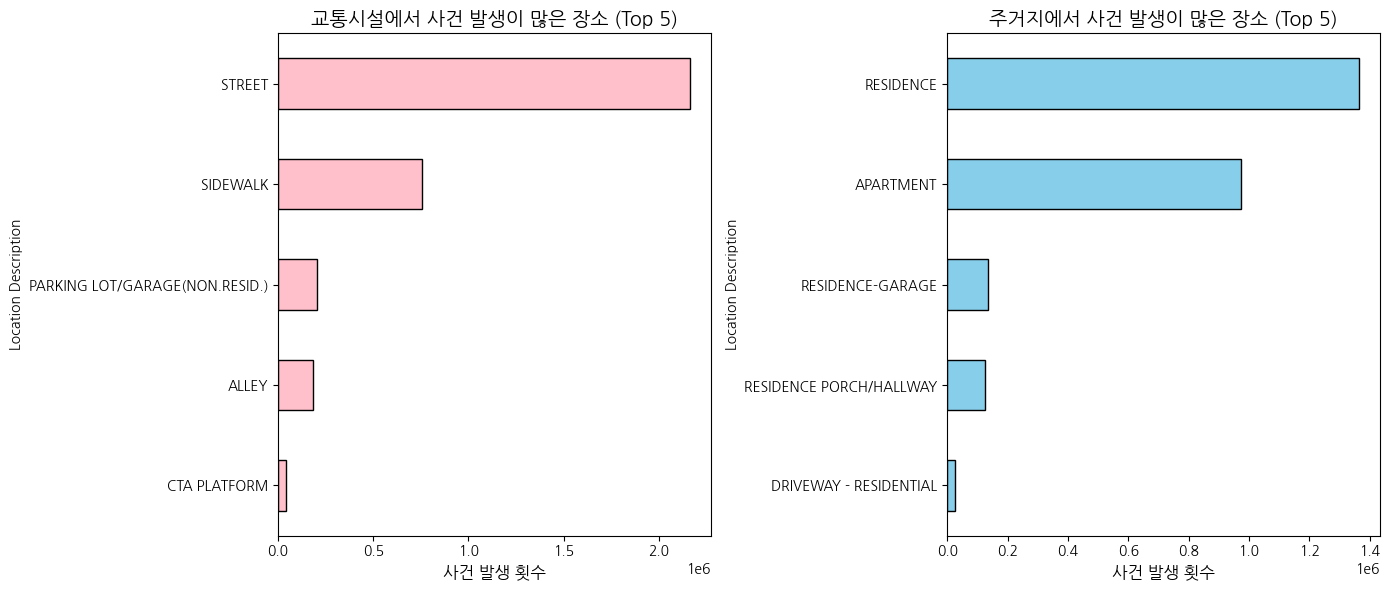

In [36]:
# 교통시설과 주거지 데이터 필터링
transportation_crimes = chicago[chicago['location_category'] == '교통시설']
residential_crimes = chicago[chicago['location_category'] == '주거지']

# 장소별 사건 발생 횟수 집계
top_transportation = transportation_crimes['Location Description'].value_counts().head(5)
top_residential = residential_crimes['Location Description'].value_counts().head(5)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 교통시설 사건 발생 시각화
top_transportation.plot(kind='barh', ax=axes[0], color='pink', edgecolor='black')
axes[0].set_title('교통시설에서 사건 발생이 많은 장소 (Top 5)', fontsize=14)
axes[0].set_xlabel('사건 발생 횟수', fontsize=12)
axes[0].invert_yaxis()

# 주거지 사건 발생 시각화
top_residential.plot(kind='barh', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('주거지에서 사건 발생이 많은 장소 (Top 5)', fontsize=14)
axes[1].set_xlabel('사건 발생 횟수', fontsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
top_transportation # 거리 인도 주차장/차고(비거주지) 골목 CTA 승강장

,count
Location Description,
STREET,2162305
SIDEWALK,754537
PARKING LOT/GARAGE(NON.RESID.),202763
ALLEY,184196
CTA PLATFORM,40898


In [ ]:
top_residential # 주거지 아파트 주택차고 주택 현관복도 주택 진입로

,count
Location Description,
RESIDENCE,1365779
APARTMENT,973511
RESIDENCE-GARAGE,135319
RESIDENCE PORCH/HALLWAY,124138
DRIVEWAY - RESIDENTIAL,24313


#### 강력범죄가 발생하는 장소

- 전테 데이터에서

In [38]:
# 강력범죄 리스트 정의
violent_crimes = [
    "HOMICIDE", "CRIMINAL SEXUAL ASSAULT", "ROBBERY", "BATTERY", "RITUALISM",
    "ASSAULT", "BURGLARY", "THEFT", "MOTOR VEHICLE THEFT", "HUMAN TRAFFICKING", "ARSON"
]

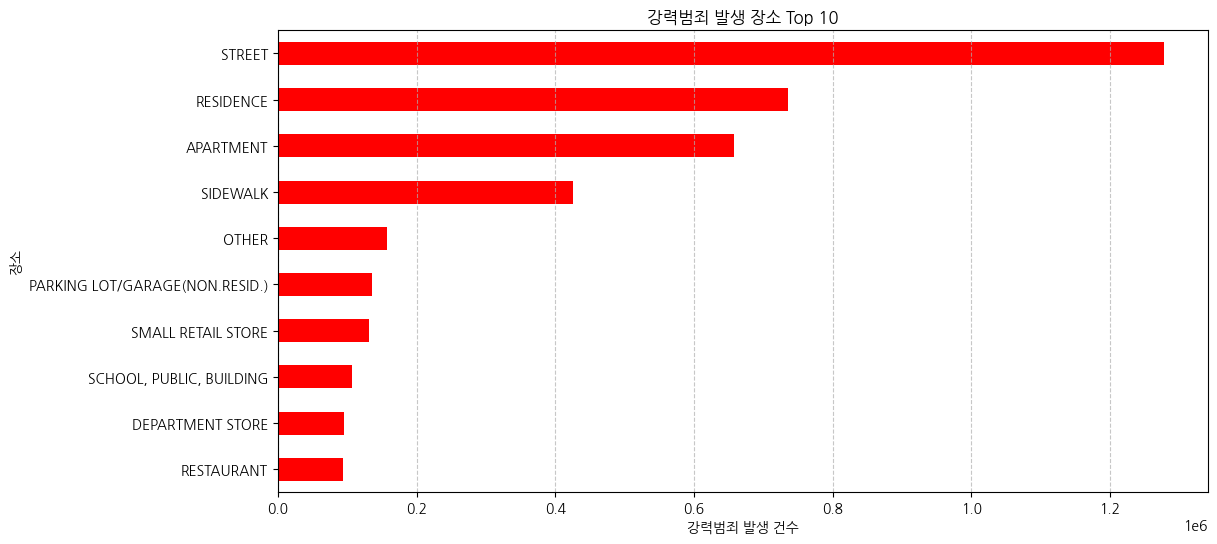

In [39]:
# 강력범죄 데이터 필터링
violent_crime_data = chicago[chicago['Primary Type'].isin(violent_crimes)]

# 장소별 강력범죄 발생 건수 집계
violent_crime_by_location = violent_crime_data['Location Description'].value_counts().head(10)

# 시각화
plt.figure(figsize=(12, 6))
violent_crime_by_location.sort_values().plot(kind='barh', color='red')
plt.xlabel('강력범죄 발생 건수')
plt.ylabel('장소')
plt.title('강력범죄 발생 장소 Top 10')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


- 장소를 그룹화해서

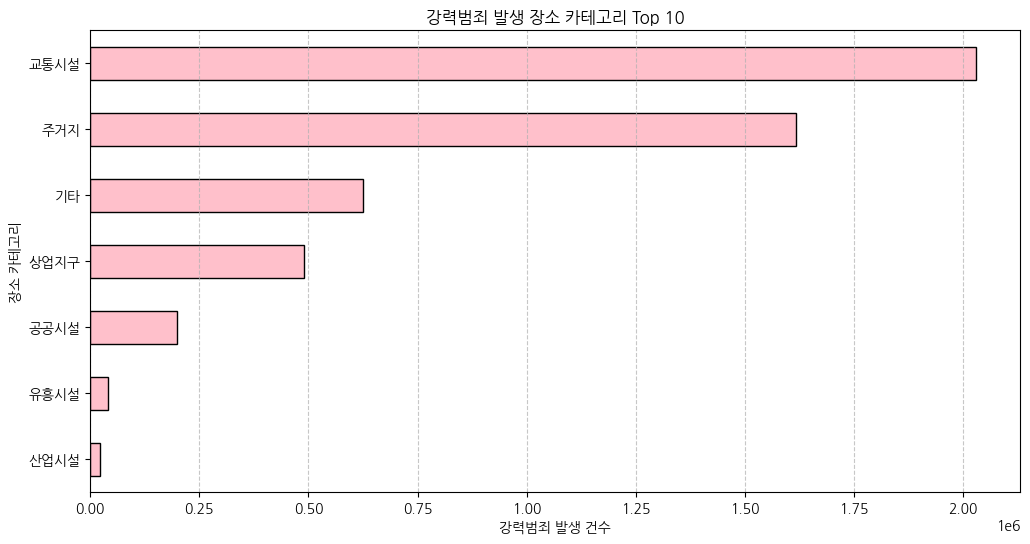

In [40]:
# 강력범죄 데이터 필터링
violent_crime_data = chicago[chicago['Primary Type'].isin(violent_crimes)]

# 장소 카테고리별 강력범죄 발생 건수 집계
violent_crime_by_category = violent_crime_data['location_category'].value_counts().head(10)

# 시각화
plt.figure(figsize=(12, 6))
violent_crime_by_category.sort_values().plot(kind='barh', color='pink', edgecolor ='black')
plt.xlabel('강력범죄 발생 건수')
plt.ylabel('장소 카테고리')
plt.title('강력범죄 발생 장소 카테고리 Top 10')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

► 많이 발생한 곳은 교통시설과 주거지
 오히려 유흥시설에서는 많이 발생하지 않은 것을 알 수 있다.

- 교통시설과 주거지 내에서도 많이 발생한 top5 씩 추출

In [43]:
# 강력범죄 데이터 필터링
violent_crime_data = chicago[chicago['Primary Type'].isin(violent_crimes)]

# 교통시설과 주거지 데이터만 필터링
transportation_crimes = violent_crime_data[violent_crime_data['location_category'] == '교통시설']
residential_crimes = violent_crime_data[violent_crime_data['location_category'] == '주거지']

# 장소별 강력범죄 발생 건수 집계
top5_transportation = transportation_crimes['Location Description'].value_counts().head(5)
top5_residential = residential_crimes['Location Description'].value_counts().head(5)

# 데이터프레임으로 정리
top5_transportation_df = top5_transportation.reset_index()
top5_transportation_df.columns = ['교통시설 내 장소', '강력범죄 발생 건수']

top5_residential_df = top5_residential.reset_index()
top5_residential_df.columns = ['주거지 내 장소', '강력범죄 발생 건수']

# 결과 출력
print("교통시설 내 강력범죄 발생 장소 Top 5")
print(top5_transportation_df)
print("주거지 내 강력범죄 발생 장소 Top 5")
print(top5_residential_df)

교통시설 내 강력범죄 발생 장소 Top 5
                        교통시설 내 장소  강력범죄 발생 건수
0                          STREET     1277404
1                        SIDEWALK      425713
2  PARKING LOT/GARAGE(NON.RESID.)      135050
3                           ALLEY       93540
4                       CTA TRAIN       25891
주거지 내 강력범죄 발생 장소 Top 5
                  주거지 내 장소  강력범죄 발생 건수
0                RESIDENCE      735378
1                APARTMENT      657771
2         RESIDENCE-GARAGE       93093
3  RESIDENCE PORCH/HALLWAY       82442
4   DRIVEWAY - RESIDENTIAL       14864


<ipython-input-47-2915369b0fe9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-47-2915369b0fe9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


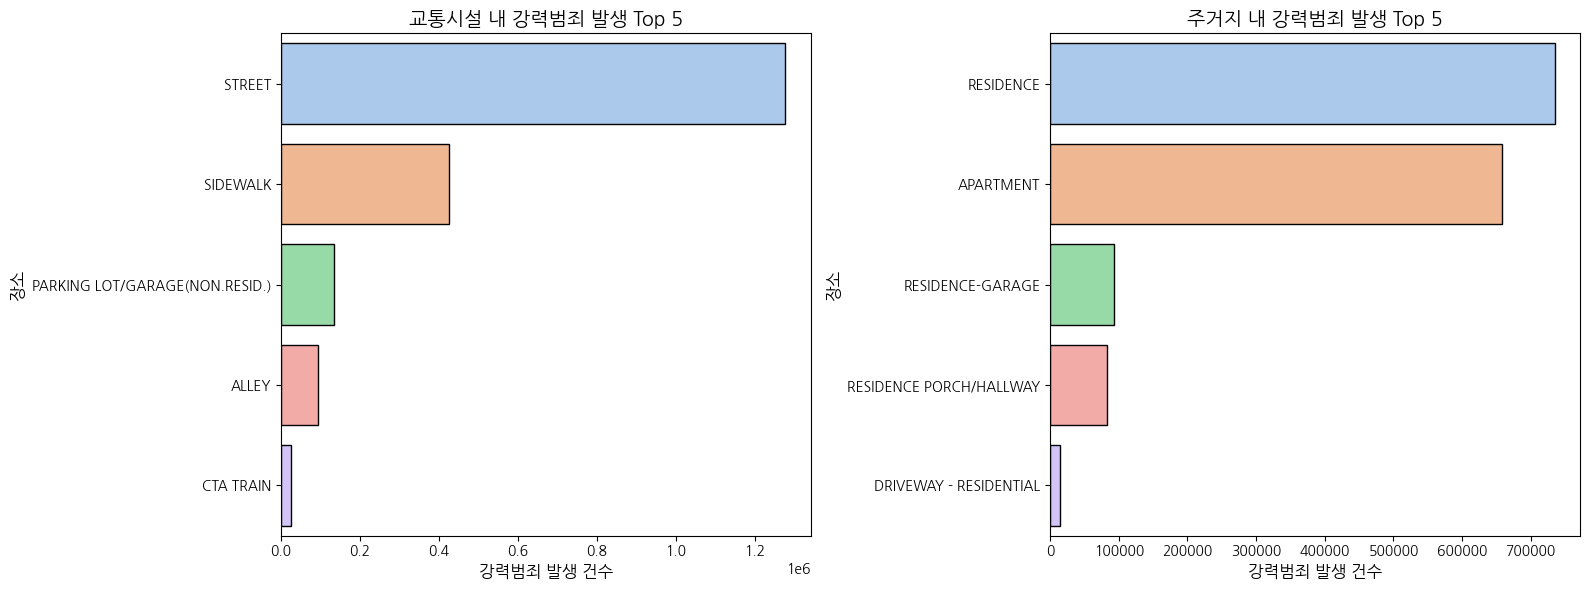

In [47]:
# 그래프 크기 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 교통시설 내 강력범죄 발생 장소 Top 5
sns.barplot(
    data=top5_transportation_df,
    x="강력범죄 발생 건수",
    y="교통시설 내 장소",
    palette="pastel",
    edgecolor='black',
    ax=axes[0]
)
axes[0].set_title("교통시설 내 강력범죄 발생 Top 5", fontsize=14)
axes[0].set_xlabel("강력범죄 발생 건수", fontsize=12)
axes[0].set_ylabel("장소", fontsize=12)

# 주거지 내 강력범죄 발생 장소 Top 5
sns.barplot(
    data=top5_residential_df,
    x="강력범죄 발생 건수",
    y="주거지 내 장소",
    palette="pastel",
    edgecolor='black',
    ax=axes[1]
)
axes[1].set_title("주거지 내 강력범죄 발생 Top 5", fontsize=14)
axes[1].set_xlabel("강력범죄 발생 건수", fontsize=12)
axes[1].set_ylabel("장소", fontsize=12)

# 레이아웃 조정 후 출력
plt.tight_layout()
plt.show()


► 강력 범죄는 특히 교통시설과 주거지에서 많이 발생하며
  그중에서도 STREET, SIDEWALK / RESIDENCE, APARTMENT에서 두드러지게 많이 나타남

<ipython-input-56-f09aa4121e7d>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-56-f09aa4121e7d>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-56-f09aa4121e7d>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-56-f09aa4121e7d>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




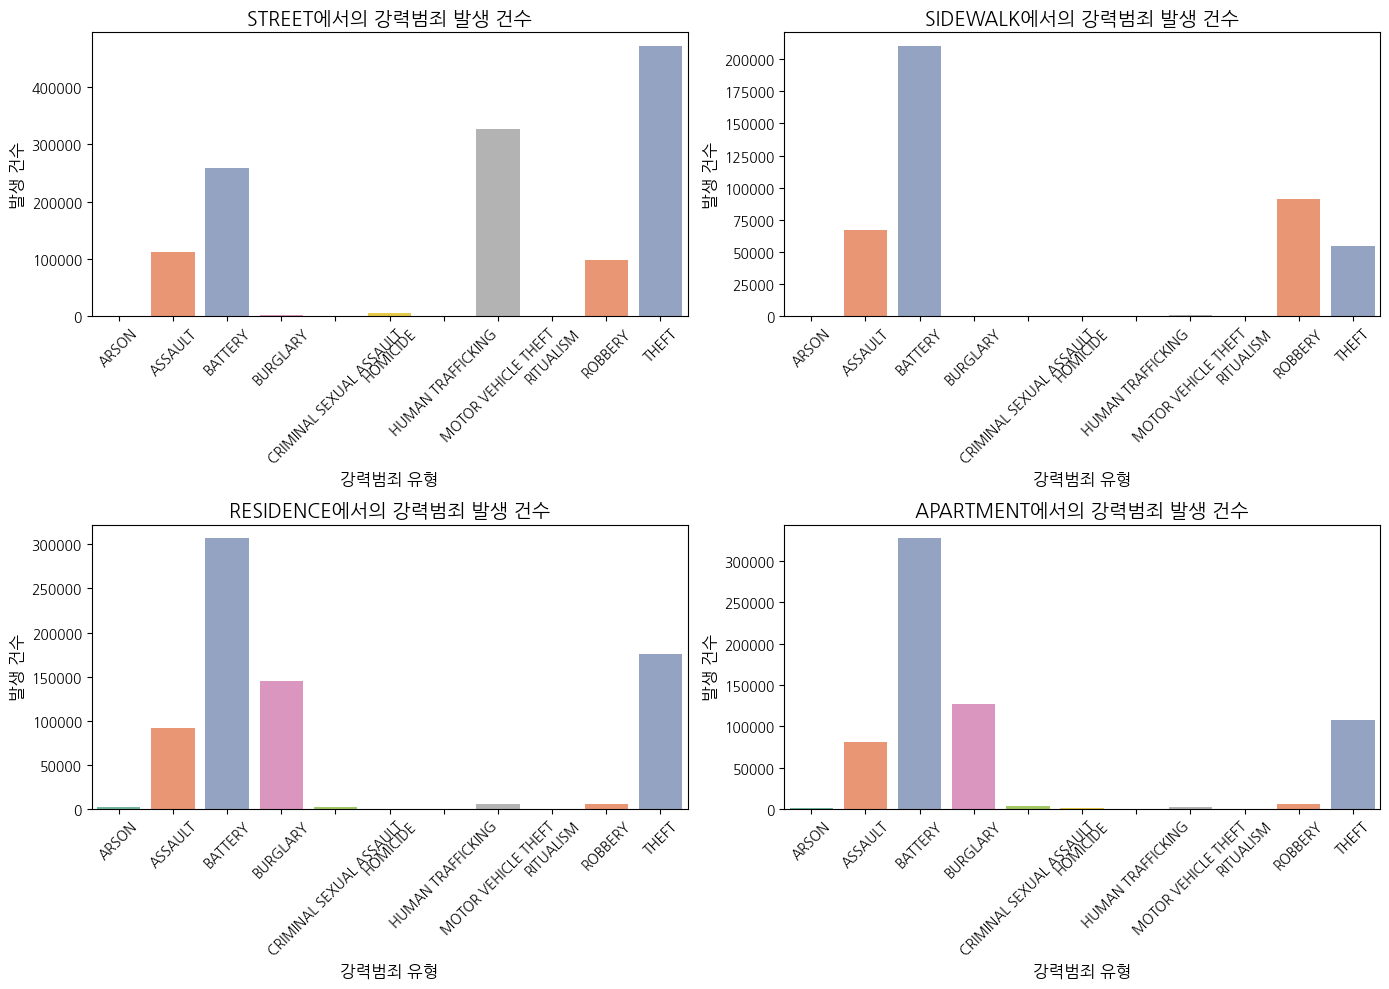

In [ ]:
# 네 개의 장소에 대한 강력범죄 발생 건수 필터링
top_locations_data = violent_crime_data[violent_crime_data['Location Description'].isin(['STREET', 'SIDEWALK', 'RESIDENCE', 'APARTMENT'])]

# 장소별로 강력범죄 발생 건수 집계
crime_counts_by_location = top_locations_data.groupby(['Location Description', 'Primary Type']).size().reset_index(name='count')

# subplot 설정 (4개의 그래프를 한 번에 출력)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2행 2열 subplot
axes = axes.flatten()  # 2차원 배열을 1차원 배열로 변경

# 각 장소별로 그래프를 그리기
locations = ['STREET', 'SIDEWALK', 'RESIDENCE', 'APARTMENT']
for i, location in enumerate(locations):
    ax = axes[i]  # 각 서브플롯에 접근
    sns.barplot(
        data=crime_counts_by_location[crime_counts_by_location['Location Description'] == location],
        x='Primary Type',
        y='count',
        ax=ax,
        palette='Set2'
    )
    ax.set_title(f'{location}에서의 강력범죄 발생 건수', fontsize=14)
    ax.set_xlabel('강력범죄 유형', fontsize=12)
    ax.set_ylabel('발생 건수', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

* Street : theft 도난, human trafficking 인신매매, battery 폭행(물리적), assault(위협) 폭행, robbery 강도
* Sidewalk : battery 폭행, robbery 강도, assault 폭행, theft 도난
* Residence : battery 폭행, theft 도난, burglary 절도 및 침입, assault 폭행(위협)
* Apartment : battery 폭행, burglary 절도 및 침입, theft 도난, assault 폭행

**범죄의 시간대 별 양상 분석**

In [ ]:
violent_crime_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time',
       'location_category'],
      dtype='object')

<ipython-input-64-729c4cbf29db>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-64-729c4cbf29db>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-729c4cbf29db>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



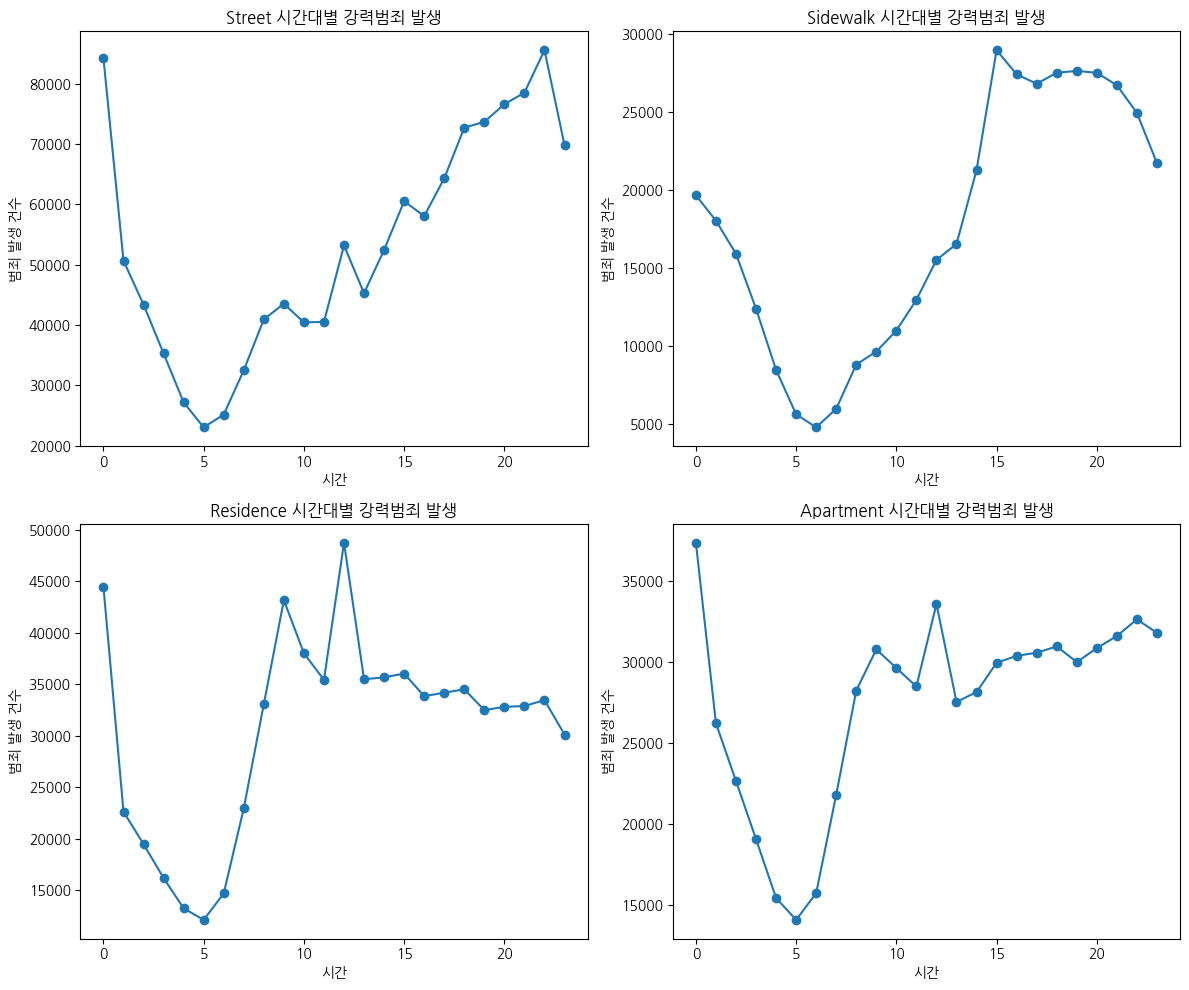

In [ ]:
# Time 컬럼을 datetime 형식으로 변환
violent_crime_data['Time'] = pd.to_datetime(violent_crime_data['Time'], errors='coerce')

violent_crime_data['hour'] = violent_crime_data['Time'].dt.hour

# 장소별 시간대별 강력범죄 발생 건수 집계
street_data = violent_crime_data[violent_crime_data['Location Description'] == 'STREET']
sidewalk_data = violent_crime_data[violent_crime_data['Location Description'] == 'SIDEWALK']
residence_data = violent_crime_data[violent_crime_data['Location Description'] == 'RESIDENCE']
apartment_data = violent_crime_data[violent_crime_data['Location Description'] == 'APARTMENT']

# 각 시간대별 사건 건수 집계
street_crime_by_hour = street_data.groupby('hour').size()
sidewalk_crime_by_hour = sidewalk_data.groupby('hour').size()
residence_crime_by_hour = residence_data.groupby('hour').size()
apartment_crime_by_hour = apartment_data.groupby('hour').size()

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 각 장소별 시간대별 범죄 시각화
axes[0, 0].plot(street_crime_by_hour.index, street_crime_by_hour.values, marker='o')
axes[0, 0].set_title('Street 시간대별 강력범죄 발생')
axes[0, 0].set_xlabel('시간')
axes[0, 0].set_ylabel('범죄 발생 건수')

axes[0, 1].plot(sidewalk_crime_by_hour.index, sidewalk_crime_by_hour.values, marker='o')
axes[0, 1].set_title('Sidewalk 시간대별 강력범죄 발생')
axes[0, 1].set_xlabel('시간')
axes[0, 1].set_ylabel('범죄 발생 건수')

axes[1, 0].plot(residence_crime_by_hour.index, residence_crime_by_hour.values, marker='o')
axes[1, 0].set_title('Residence 시간대별 강력범죄 발생')
axes[1, 0].set_xlabel('시간')
axes[1, 0].set_ylabel('범죄 발생 건수')

axes[1, 1].plot(apartment_crime_by_hour.index, apartment_crime_by_hour.values, marker='o')
axes[1, 1].set_title('Apartment 시간대별 강력범죄 발생')
axes[1, 1].set_xlabel('시간')
axes[1, 1].set_ylabel('범죄 발생 건수')

plt.tight_layout()
plt.show()

🛣️ Street

    - 0시~2시: 가장 높은 범죄 발생 — 야간 강력범죄 집중

    - 오전 5~6시: 최저점 (사람이 적게 다니는 시간)

    - 오후 18시~21시: 다시 범죄 급증 — 출퇴근/귀가 시간대 주의 필요

🚶 Sidewalk


    - 0시~5시: 낮은 발생률

    - 15시 이후: 강력 범죄 급증 → 사람들이 가장 많이 다니는 시간대

    - 16~20시 사이가 가장 위험

🏠 Residence


    - 0~5시: 범죄 발생 낮음 (사람들이 집에 있음)

    - 8~11시: 급증 → 출근 후 빈집을 노린 침입범죄 가능성

     이후에도 일정한 수준 유지됨

🏢 Apartment

     - Residence와 유사함

     - 오전 9~11시 사이 급증 → 출근 후 도난/침입

     - 저녁 시간대에는 일정한 수준 유지


► 야간에는 거리나 골목(Street, Sidewalk)에서의 강력 범죄가 많고,

  오전에는 주거지(Residence, Apartment) 침입 및 도난 범죄가 활발.

In [ ]:
chicago[['District', 'Beat']]

,District,Beat
0,5.0,511
1,5.0,512
2,5.0,523
3,16.0,1622
4,9.0,923
...,...,...
8276667,18.0,1822
8276668,18.0,1811
8276669,11.0,1122
8276670,9.0,914


### 가설 도출

**=> 가설 도출 : 보는 사람의 눈이 적을 때 범죄가 일어난다.**

### community area 별 crime count top5와 bottom5 비교

In [ ]:
crime_by_area = chicago.groupby('Community Area').size().reset_index(name='Crime Count')

In [ ]:
comunityarea_crime_top_5= crime_by_area.sort_values(by='Crime Count', ascending=False).head(5)
comunityarea_crime_top_5

,Community Area,Crime Count
24,25.0,510458
7,8.0,296872
42,43.0,271447
22,23.0,257108
27,28.0,257077


In [ ]:
comunityarea_crime_bottom_5= crime_by_area.sort_values(by='Crime Count', ascending=False).tail(5)
comunityarea_crime_bottom_5

,Community Area,Crime Count
54,55.0,18665
73,74.0,18588
11,12.0,15326
46,47.0,12182
8,9.0,8268


#### 1. 인구 비교

In [ ]:
c_name.columns

Index(['Community Area', 'name', 'population', 'income', 'requests', 'latinos',
       'blacks', 'white', 'asian', 'other'],
      dtype='object')

In [ ]:
comunityarea_crime_top_5['Community Area'] = comunityarea_crime_top_5['Community Area'].astype(int)
# 'Community Area' 컬럼을 모두 문자열로 변환
comunityarea_crime_top_5['Community Area'] = comunityarea_crime_top_5['Community Area'].astype(str)
c_name['Community Area'] = c_name['Community Area'].astype(str)

In [ ]:
merge_top5 = pd.merge(comunityarea_crime_top_5, c_name, how='left', on='Community Area')

In [ ]:
merge_top5.head()

,Community Area,Crime Count,name,population,income,requests,latinos,blacks,white,asian,other
0,25,510458,Austin,98514,32358,5008.019165,0.089,0.851,0.044,0.006,0.010
1,8,296872,Near North Side,80484,76290,1717.608469,0.049,0.108,0.721,0.101,0.020
2,43,271447,South Shore,52010,27903,3756.393001,0.017,0.949,0.014,0.002,0.018
3,23,257108,Humboldt Park,56323,29605,4942.208334,0.533,0.409,0.044,0.004,0.009
4,28,257077,Near West Side,54881,62770,3854.157176,0.092,0.315,0.420,0.146,0.027


In [ ]:
comunityarea_crime_bottom_5['Community Area'] = comunityarea_crime_bottom_5['Community Area'].astype(int)
comunityarea_crime_bottom_5['Community Area'] = comunityarea_crime_bottom_5['Community Area'].astype(str)
merge_bottom5 = pd.merge(comunityarea_crime_bottom_5, c_name, how='left', on='Community Area')
merge_bottom5

,Community Area,Crime Count,name,population,income,requests,latinos,blacks,white,asian,other
0,55,18665,Hegewisch,9426,49924,6153.193295,0.496,0.039,0.449,0.005,0.011
1,74,18588,Mount Greenwood,19093,80505,4357.617975,0.072,0.052,0.860,0.007,0.010
2,12,15326,Forest Glen,18508,87394,5237.194727,0.115,0.007,0.746,0.107,0.024
3,47,12182,Burnside,2916,32553,6063.100137,0.007,0.977,0.007,0.000,0.010
4,9,8268,Edison Park,11187,77678,4754.625905,0.078,0.003,0.884,0.024,0.012


-> 인구수에 따라 커뮤티니지역의 사건발생건수가 차이나는 것을 알 수 있음

#### 범죄 발생 비율: 각 Community Area별 인구수에 비례해 범죄 발생률 계산

- crime_by_area 별 인구수를 보기 위해 merge

In [ ]:
crime_by_area['Community Area'] = crime_by_area['Community Area'].astype(int)
crime_by_area['Community Area'] = crime_by_area['Community Area'].astype(str)
merge_crime_by_area = pd.merge(crime_by_area, c_name, how='left', on='Community Area')
merge_crime_by_area.head()

,Community Area,Crime Count,name,population,income,requests,latinos,blacks,white,asian,other
0,1,129939,Rogers Park,54991,39482,3204.888073,0.244,0.263,0.393,0.064,0.036
1,2,105838,West Ridge,71942,47323,3906.341219,0.204,0.111,0.427,0.225,0.032
2,3,124816,Uptown,56362,40324,2164.046698,0.142,0.200,0.516,0.114,0.028
3,4,59983,Lincoln Square,39493,57749,3827.260527,0.191,0.038,0.631,0.111,0.029
4,5,49589,North Center,31867,81524,5307.998870,0.136,0.023,0.773,0.045,0.022


In [ ]:
# Crime Rate가 높은 순으로 정렬하여 표시
merge_crime_by_area['Crime Rate'] = merge_crime_by_area['Crime Count'] / merge_crime_by_area['population']
crime_rate_table = merge_crime_by_area[['Community Area', 'Crime Count', 'population', 'Crime Rate']].sort_values(by='Crime Rate', ascending=False)

# 표 출력
print(crime_rate_table)

   Community Area  Crime Count  population  Crime Rate
36             37        27503        2876    9.562935
25             26       151777       18001    8.431587
39             40        87730       11717    7.487411
26             27       152201       20567    7.400253
31             32       208691       29283    7.126695
..            ...          ...         ...         ...
16             17        50993       41932    1.216088
9              10        36218       37023    0.978257
73             74        18588       19093    0.973551
11             12        15326       18508    0.828074
8               9         8268       11187    0.739072

[77 rows x 4 columns]


#### 범죄 유형별 분석
Community Area별로 범죄 유형이 어떻게 분포하는지<br>
특정 지역에서 폭력 범죄나 재산 범죄가 두드러지는지 살펴볼 수 있습니다.

In [ ]:
crime_by_type_area = chicago.groupby(['Community Area', 'Primary Type']).size().reset_index(name='Crime Count')

In [ ]:
# 상위 3개 범죄 유형 추출 함수
top_3_crimes = crime_by_type_area.groupby('Community Area').apply(lambda x: x.nlargest(3, 'Crime Count')).reset_index(drop=True)

# 결과 출력
print(top_3_crimes)

     Community Area     Primary Type  Crime Count
0               1.0            THEFT        29051
1               1.0          BATTERY        24077
2               1.0  CRIMINAL DAMAGE        15393
3               2.0            THEFT        25943
4               2.0          BATTERY        16642
..              ...              ...          ...
226            76.0    OTHER OFFENSE         7057
227            76.0          BATTERY         4921
228            77.0            THEFT        24855
229            77.0          BATTERY        14035
230            77.0  CRIMINAL DAMAGE         9313

[231 rows x 3 columns]


<ipython-input-26-35d5ecef8148>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_crimes = crime_by_type_area.groupby('Community Area').apply(lambda x: x.nlargest(3, 'Crime Count')).reset_index(drop=True)


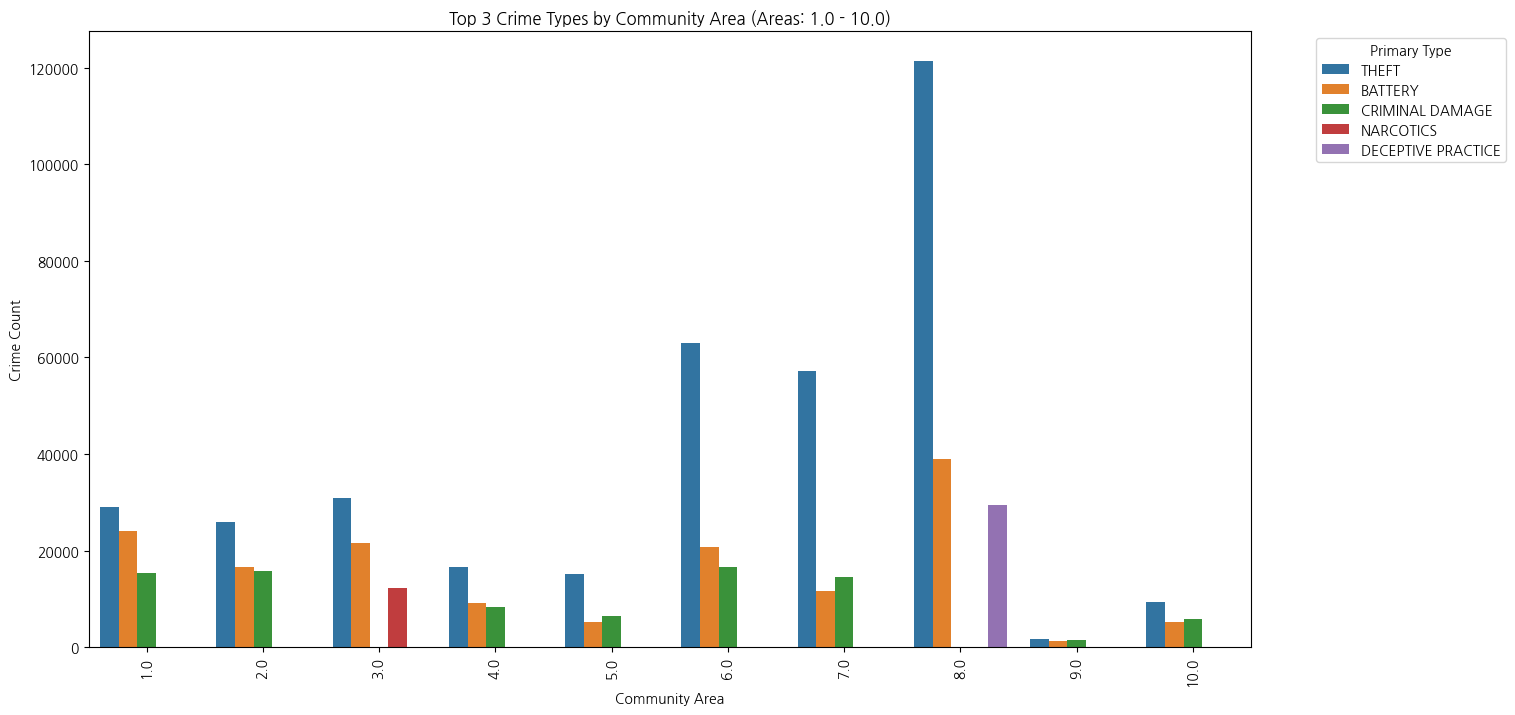

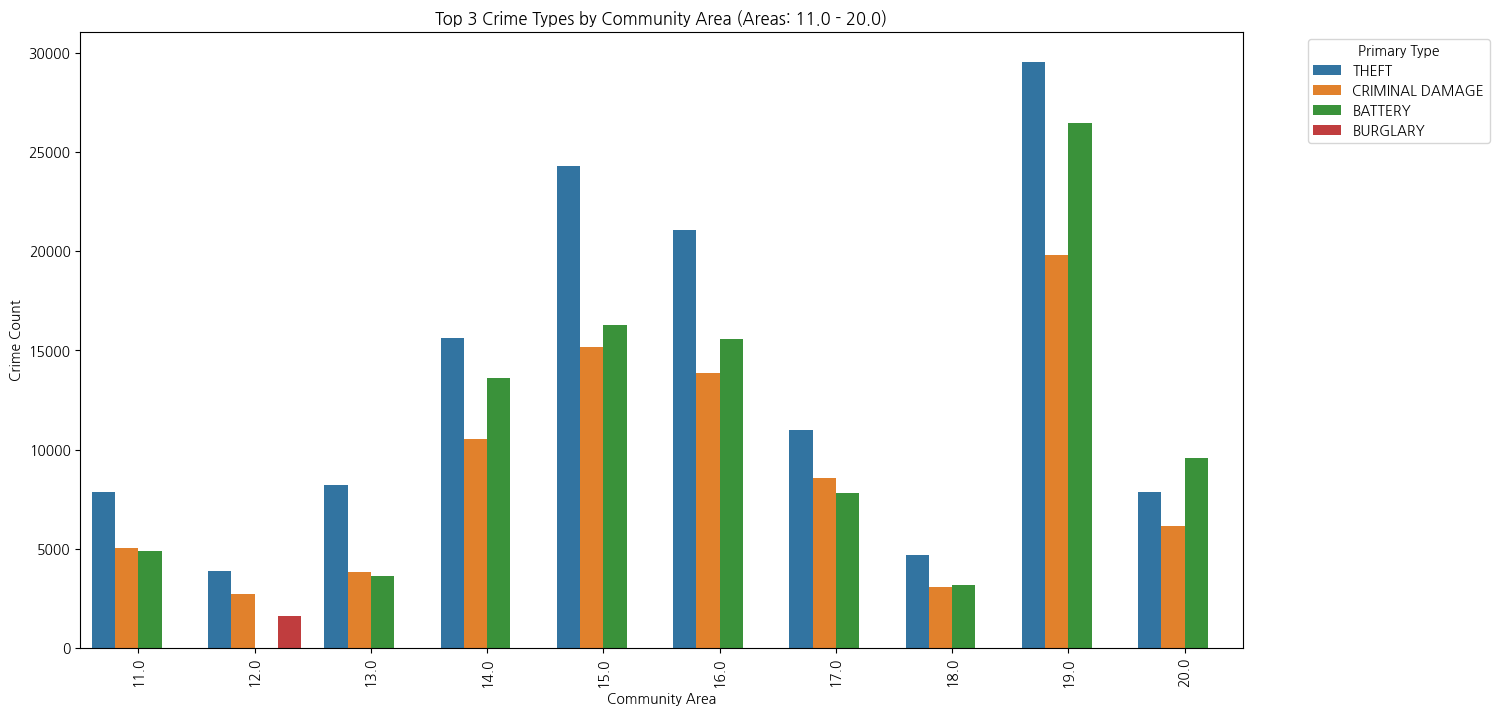

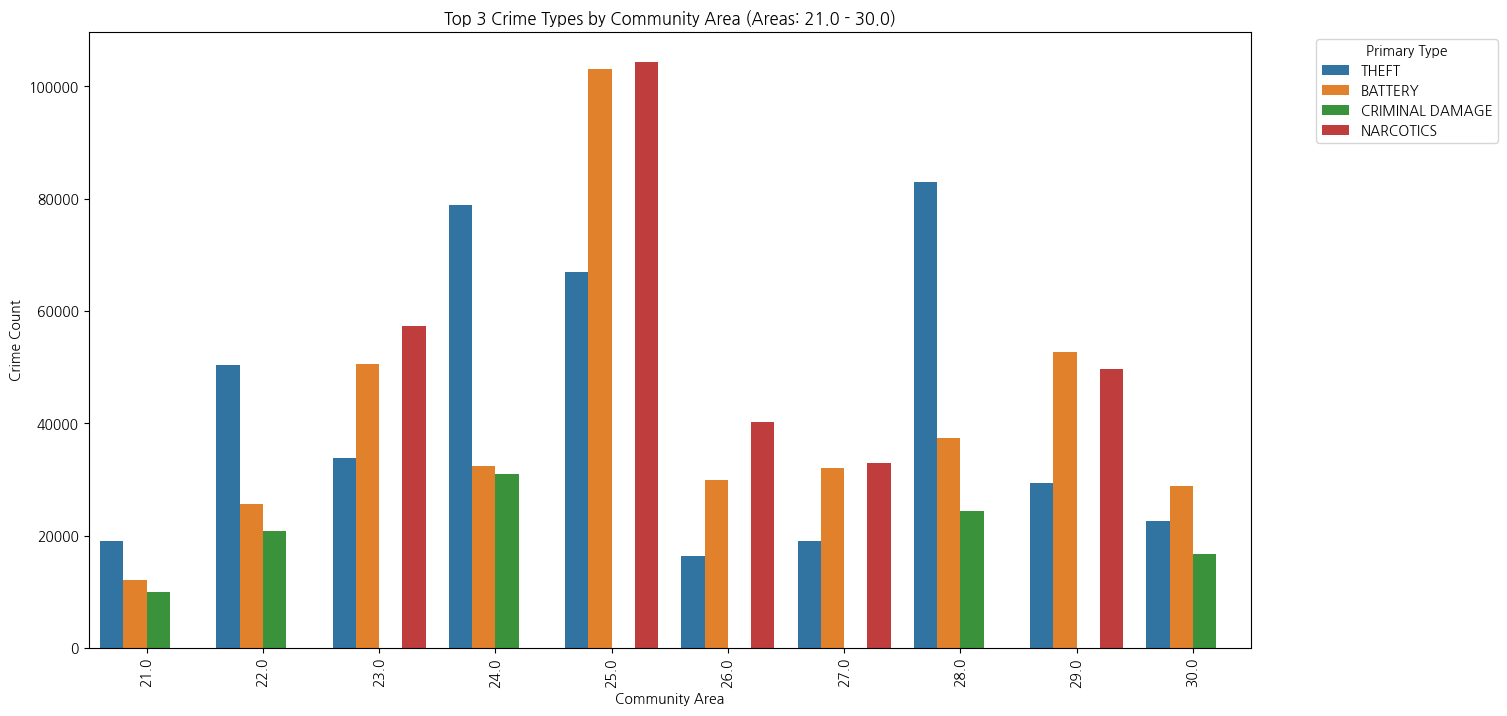

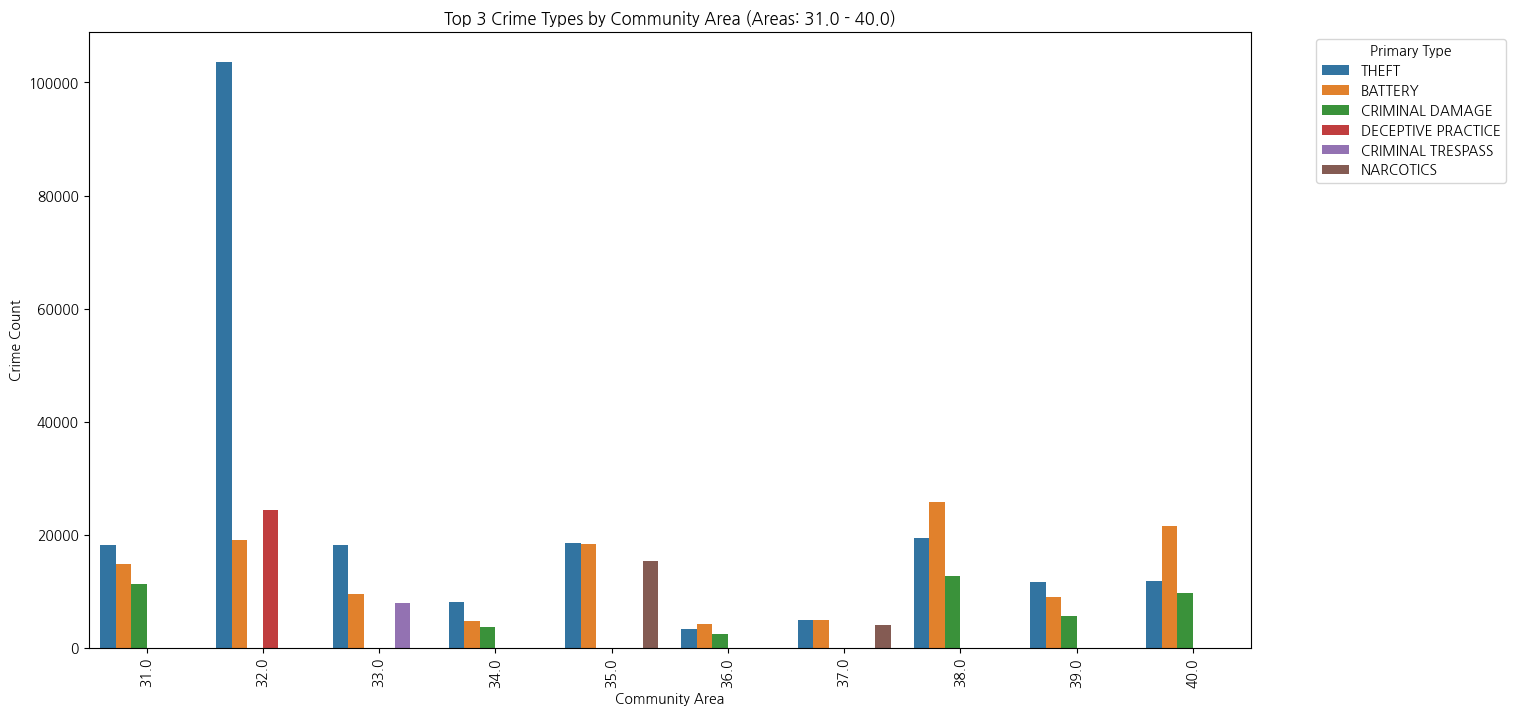

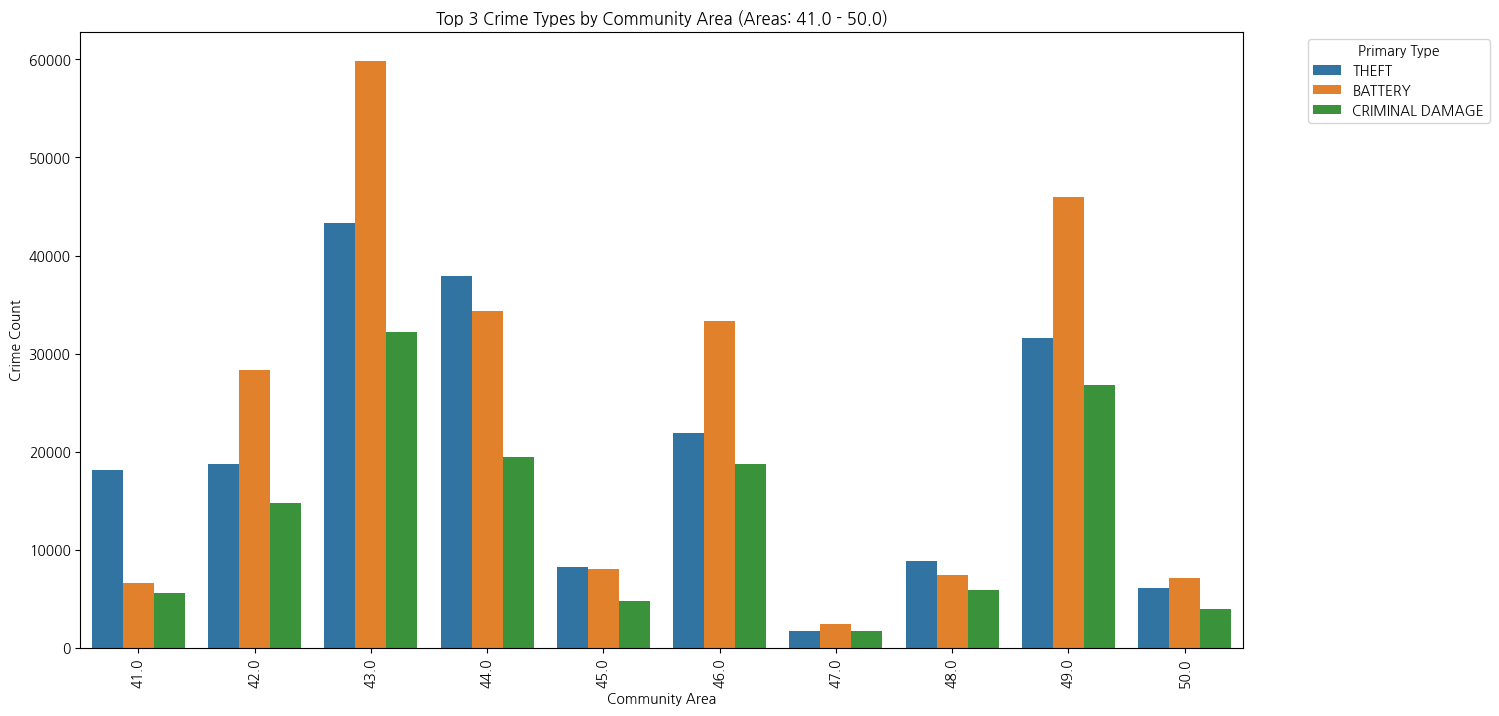

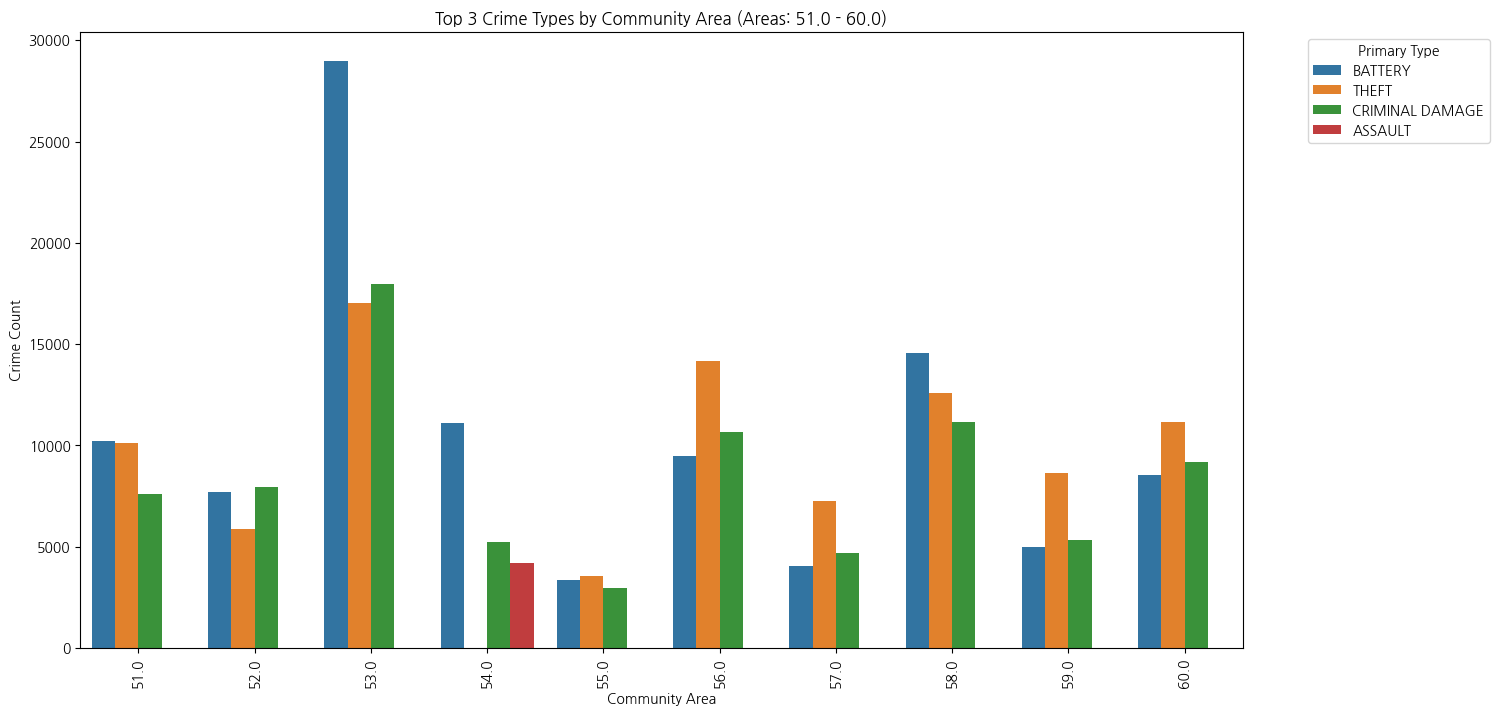

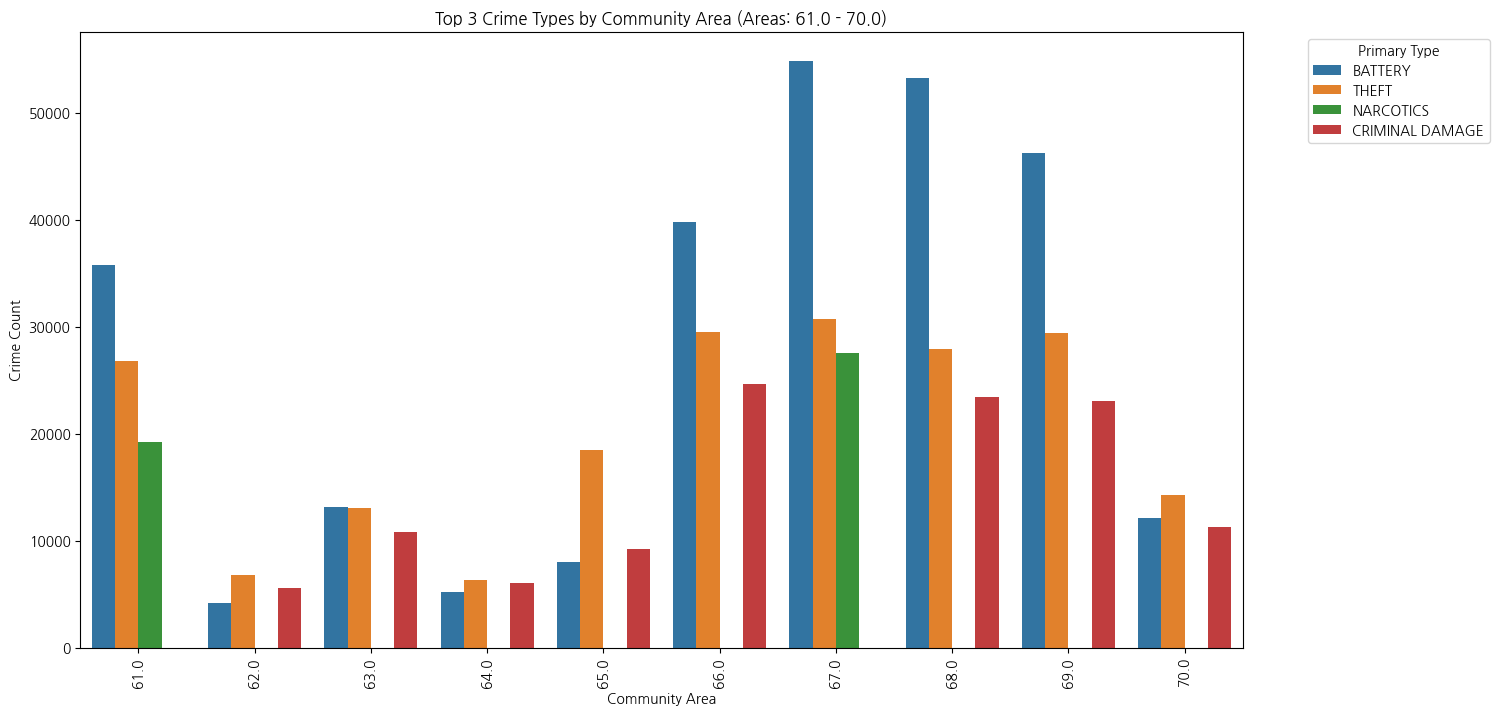

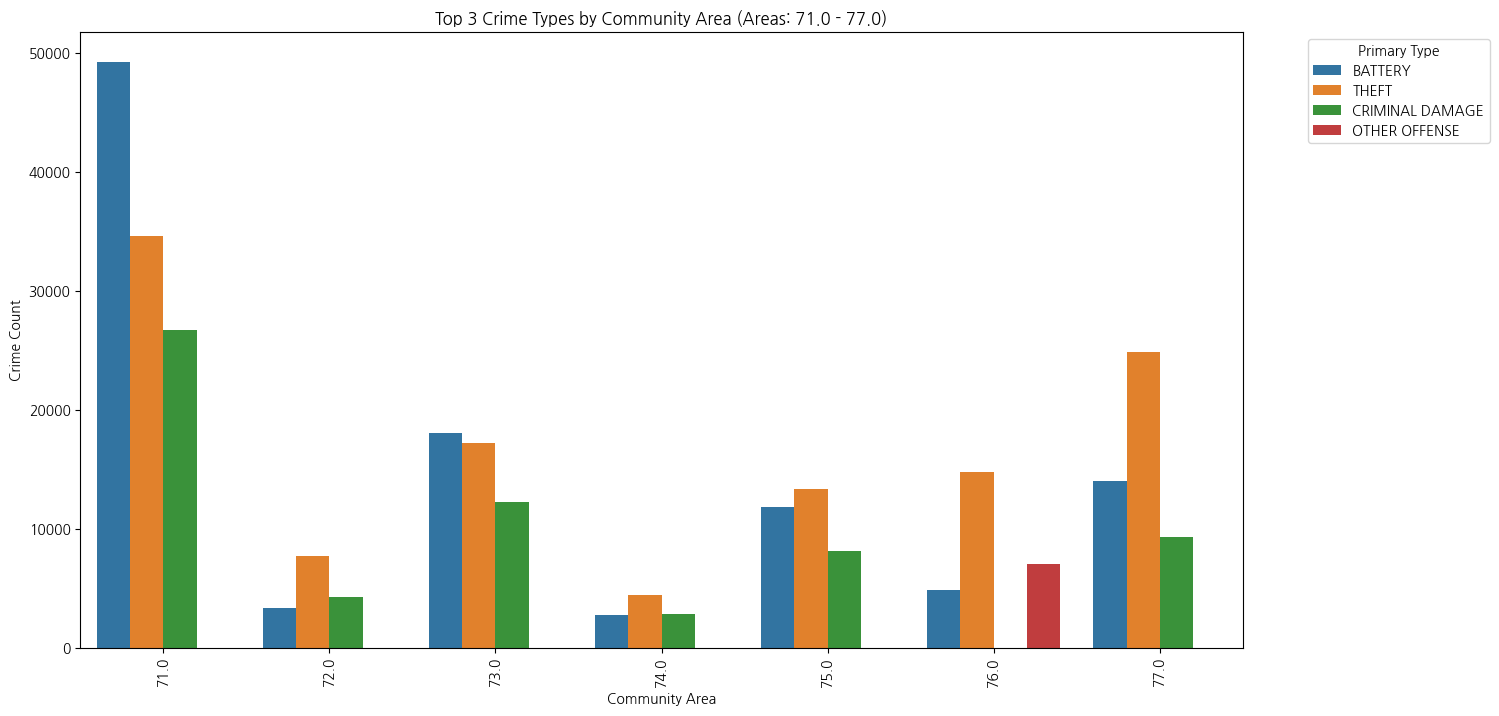

In [ ]:
# Community Area 번호 순으로 정렬
top_3_crimes = top_3_crimes.sort_values('Community Area')

# Community Area를 10개씩 나누기
unique_areas = top_3_crimes['Community Area'].unique()
chunks = [unique_areas[i:i+10] for i in range(0, len(unique_areas), 10)]

# 각 그룹(10개씩)에 대해 그래프 그리기
for chunk in chunks:
    plt.figure(figsize=(15, 8))
    subset = top_3_crimes[top_3_crimes['Community Area'].isin(chunk)]
    sns.barplot(x='Community Area', y='Crime Count', hue='Primary Type', data=subset)

    # 범례를 그래프 바깥으로 이동
    plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xticks(rotation=90)  # x축 라벨 회전
    plt.title(f'Top 3 Crime Types by Community Area (Areas: {chunk[0]} - {chunk[-1]})')
    plt.xlabel('Community Area')
    plt.ylabel('Crime Count')

    plt.show()

#### 범죄와 소득간의 관계

In [ ]:
import plotly.express as px

# Scatter plot 생성 (hover_data에 Community Area 추가)
fig = px.scatter(
    merge_crime_by_area,
    x='income',
    y='Crime Rate',
    hover_data=['Community Area'],  # 마우스 오버 시 Community Area 표시
    title='Crime Rate vs Income by Community Area',
    labels={'income': 'Income', 'Crime Rate': 'Crime Rate'}
)

fig.show()


-> 소득수준이 올라갈 수록 범죄율이 감소<br>
이상치: Community Area 32번 'Loop'지역이 income이 평균 이상인데 비해 범죄율 높음

In [ ]:
c_name[c_name['Community Area'] == '32']

,Community Area,name,population,income,requests,latinos,blacks,white,asian,other
31,32,Loop,29283,78124,3223.030427,0.069,0.115,0.627,0.159,0.031


#### Loop(32) 지역 분석

In [ ]:
# 'Loop' 지역만 필터링하여 범죄 유형 분석
loop_data = chicago[chicago['Community Area'] == '32']

# 'Loop' 지역의 범죄 유형 분포
loop_crime_by_type = loop_data['Primary Type'].value_counts()

# 다른 지역들의 범죄 유형 분포
other_areas_data = chicago[chicago['Community Area'] != 32]
other_crime_by_type = other_areas_data['Primary Type'].value_counts()

# 결과 출력
print("Loop Area Crime Types:")
print(loop_crime_by_type)

# 결과 출력
print("27 Area Crime Types:")
print(loop_crime_by_type)

print("\nOther Areas Crime Types:")
print(other_crime_by_type)

Loop Area Crime Types:
Series([], Name: count, dtype: int64)
27 Area Crime Types:
Series([], Name: count, dtype: int64)

Other Areas Crime Types:
Primary Type
THEFT                                1650388
BATTERY                              1489284
CRIMINAL DAMAGE                       931074
NARCOTICS                             754773
ASSAULT                               541771
OTHER OFFENSE                         506879
BURGLARY                              436487
MOTOR VEHICLE THEFT                   416078
DECEPTIVE PRACTICE                    353567
ROBBERY                               305172
CRIMINAL TRESPASS                     214294
WEAPONS VIOLATION                     120623
PROSTITUTION                           69725
OFFENSE INVOLVING CHILDREN             59136
PUBLIC PEACE VIOLATION                 52272
SEX OFFENSE                            32487
CRIM SEXUAL ASSAULT                    26986
INTERFERENCE WITH PUBLIC OFFICER       19306
LIQUOR LAW VIOLATION           



'Loop' 지역은 고소득 지역이지만 범죄율이 다른 지역들과 다르게 나타나는 특성을 보인다. <br>
이 지역은 상업지구로서의 특성, 높은 유동인구, 특정 범죄 유형 등이 영향을 미쳤을 가능성이 있음

#### 클러스터링

Crime Count(범죄 건수)와 Crime Rate(범죄율)을 기준으로 3개 군집

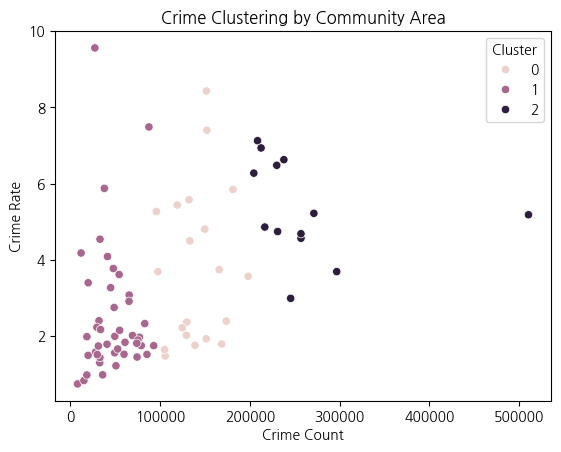

In [ ]:
from sklearn.cluster import KMeans
crime_features = merge_crime_by_area[['Crime Count', 'Crime Rate']]  # 예시로 범죄 건수와 범죄율
kmeans = KMeans(n_clusters=3)
merge_crime_by_area['Cluster'] = kmeans.fit_predict(crime_features)
sns.scatterplot(x='Crime Count', y='Crime Rate', hue='Cluster', data=merge_crime_by_area)
plt.title('Crime Clustering by Community Area')
plt.show()

- Cluster 0 (중간 범죄율 & 중간 범죄 건수) → 일반적인 수준의 지역

- Cluster 1 (높은 범죄율 & 높은 범죄 건수) → 위험 지역

- Cluster 2 (낮은 범죄율 & 낮은 범죄 건수) → 비교적 안전한 지역

In [ ]:
# 클러스터별 Community Area 목록
cluster_areas = merge_crime_by_area.groupby('Cluster')['Community Area'].apply(list).reset_index()
cluster_areas

,Cluster,Community Area
0,0,"[1, 2, 3, 6, 7, 15, 19, 22, 26, 27, 30, 35, 38..."
1,1,"[4, 5, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, ..."
2,2,"[8, 23, 24, 25, 28, 29, 32, 43, 49, 67, 68, 69..."


Far North Side = 76, 9, 10, 11, 12, 13, 14, 2, 4, 1, 77, 3<br>
North West Side = 15, 16, 17 , 18, 19, 20<br>
North Side = 5, 6, 7, 21, 22<br>
West Side = 23, 24, 25, 26, 27, 28, 29, 30, 31<br>
Central = 8, 32, 33<br>
South West Side = 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68<br>
South Side = 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 60, 69<br>
Far South West Side = 70, 71, 72, 73, 74, 75<br>
Far South East Side = 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55